# Prediction football results   

<br>
<br>
<center>
    <img src="https://sport-bet2010.com/wp-content/uploads/2018/02/web-features-6.jpg" width="450" alt="soccer.logo"  />
</center>
<br>

<div style="text-align: right"> <b>By David Clavijo</b> </div>  
  
    
    

# About this Notebook

In this notebook, I show you, prediction models, for the football match results.   This notebook uses many insights got from the analysis done on other notebooks from this project (you can see my Github repository). This project aims to find out one model that predicts the results of soccer matches better than bookmakers. The notebook consists of three steps:  

1. Data preparation.

2. Construct models and compare themselves.

3. Compare models with predictions of the bookmakers.

  
  
# About Database

Database collected for forecasting the results of soccer matches (**Credits:https://www.football-data.co.uk/**).
The database consists of data of the five main leagues of world soccer by country **English Premier League (England), La Liga (Spain), Serie A (Italy), Bundesliga (Germany), and League 1 (France)**.
In the database, the data are recorded in a table for the season by each league. Example: EPL_2001, EPL, 2002, EPL_2003, etc.
The table is called using the following description:

*   EPL: English Premier League (England)
*   LALIGA: La Liga (Spain)
*   SA: Serie A (Italy)
*   BUNDESLIGA: Bundesliga (Germany)
*   L1: League 1 (France)

After each code by the league is used, the next character is "underscore",  and then continue the year of begin of the season like 2001, 2010, 2020, etc.

Further to the tables by each league and year, in the Database, I created  5 tables with records of the attendance in matches by each league, because the other tables don't exist the records of attendance. The tables are called:

*   attendance_epl
*   attendance_laliga
*   attendance_sa
*   attendance_bundesliga
*   attendance_l1

you can see how I get the data from the web site of ESPN using web-scraping in my GitHub repository. The notebook is called **Web Scraping in ESPN**.

Another important variable is the market value of the teams, so this variable is a good predictor. Then in the database we have another five tables with the market value by each team by year. The tables are called:

*   market_epl
*   market_laliga
*   market_seriea
*   market_bundesliga
*   market_ligue1
  
you can see how I get the data from transfermarkt web site using web-scraping in my GitHub repository. The notebook is called **Web Scraping in transfermarkt**.

## Headers code
the next code shows the abbreviations to headers of the tables:  
  
**Basic information matches soccer**  
Div = League Division  
Date = Match Date (dd/mm/yy)  
Time = Time of match kick off  
HomeTeam = Home Team  
AwayTeam = Away Team  
FTHG and HG = Full Time Home Team Goals  
FTAG and AG = Full Time Away Team Goals  
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)  
HTHG = Half Time Home Team Goals  
HTAG = Half Time Away Team Goals  
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)  
Attendance = Crowd Attendance  
Referee = Match Referee  

**Match Stats**  
HS = Home Team Shots  
AS = Away Team Shots  
HST = Home Team Shots on Target  
AST = Away Team Shots on Target  
HHW = Home Team Hit Woodwork  
AHW = Away Team Hit Woodwork  
HC = Home Team Corners  
AC = Away Team Corners  
HF = Home Team Fouls Committed  
AF = Away Team Fouls Committed  
HFKC = Home Team Free Kicks Conceded  
AFKC = Away Team Free Kicks Conceded  
HO = Home Team Offsides  
AO = Away Team Offsides  
HY = Home Team Yellow Cards  
AY = Away Team Yellow Cards  
HR = Home Team Red Cards  
AR = Away Team Red Cards  
HBP = Home Team Bookings Points (10 = yellow, 25 = red)  
ABP = Away Team Bookings Points (10 = yellow, 25 = red)  
  
Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).  
  
Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.  
  
**Key to 1X2 (match) betting odds data:** 
  
B365H = Bet365 home win odds  
B365D = Bet365 draw odds  
B365A = Bet365 away win odds  
BSH = Blue Square home win odds  
BSD = Blue Square draw odds  
BSA = Blue Square away win odds  
BWH = Bet&Win home win odds  
BWD = Bet&Win draw odds  
BWA = Bet&Win away win odds  
GBH = Gamebookers home win odds  
GBD = Gamebookers draw odds  
GBA = Gamebookers away win odds  
IWH = Interwetten home win odds  
IWD = Interwetten draw odds  
IWA = Interwetten away win odds  
LBH = Ladbrokes home win odds  
LBD = Ladbrokes draw odds  
LBA = Ladbrokes away win odds  
PSH and PH = Pinnacle home win odds  
PSD and PD = Pinnacle draw odds  
PSA and PA = Pinnacle away win odds  
SOH = Sporting Odds home win odds  
SOD = Sporting Odds draw odds  
SOA = Sporting Odds away win odds  
SBH = Sportingbet home win odds  
SBD = Sportingbet draw odds  
SBA = Sportingbet away win odds  
SJH = Stan James home win odds  
SJD = Stan James draw odds  
SJA = Stan James away win odds  
SYH = Stanleybet home win odds  
SYD = Stanleybet draw odds  
SYA = Stanleybet away win odds  
VCH = VC Bet home win odds  
VCD = VC Bet draw odds  
VCA = VC Bet away win odds  
WHH = William Hill home win odds  
WHD = William Hill draw odds  
WHA = William Hill away win odds  
  
Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums  
BbMxH = Betbrain maximum home win odds  
BbAvH = Betbrain average home win odds  
BbMxD = Betbrain maximum draw odds  
BbAvD = Betbrain average draw win odds  
BbMxA = Betbrain maximum away win odds  
BbAvA = Betbrain average away win odds  
  
MaxH = Market maximum home win odds  
MaxD = Market maximum draw win odds  
MaxA = Market maximum away win odds  
AvgH = Market average home win odds  
AvgD = Market average draw win odds  
AvgA = Market average away win odds  
  
**Key to total goals betting odds:**
  
BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums  
BbMx>2.5 = Betbrain maximum over 2.5 goals  
BbAv>2.5 = Betbrain average over 2.5 goals  
BbMx<2.5 = Betbrain maximum under 2.5 goals  
BbAv<2.5 = Betbrain average under 2.5 goals  
  
GB>2.5 = Gamebookers over 2.5 goals  
GB<2.5 = Gamebookers under 2.5 goals  
B365>2.5 = Bet365 over 2.5 goals  
B365<2.5 = Bet365 under 2.5 goals  
P>2.5 = Pinnacle over 2.5 goals  
P<2.5 = Pinnacle under 2.5 goals  
Max>2.5 = Market maximum over 2.5 goals  
Max<2.5 = Market maximum under 2.5 goals  
Avg>2.5 = Market average over 2.5 goals  
Avg<2.5 = Market average under 2.5 goals  
  
**Key to Asian handicap betting odds:**
  
BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums  
BbAHh = Betbrain size of handicap (home team)  
AHh = Market size of handicap (home team) (since 2019/2020)  
BbMxAHH = Betbrain maximum Asian handicap home team odds  
BbAvAHH = Betbrain average Asian handicap home team odds  
BbMxAHA = Betbrain maximum Asian handicap away team odds  
BbAvAHA = Betbrain average Asian handicap away team odds  
  
GBAHH = Gamebookers Asian handicap home team odds  
GBAHA = Gamebookers Asian handicap away team odds  
GBAH = Gamebookers size of handicap (home team)  
LBAHH = Ladbrokes Asian handicap home team odds  
LBAHA = Ladbrokes Asian handicap away team odds  
LBAH = Ladbrokes size of handicap (home team)  
B365AHH = Bet365 Asian handicap home team odds  
B365AHA = Bet365 Asian handicap away team odds  
B365AH = Bet365 size of handicap (home team)  
PAHH = Pinnacle Asian handicap home team odds  
PAHA = Pinnacle Asian handicap away team odds  
MaxAHH = Market maximum Asian handicap home team odds  
MaxAHA = Market maximum Asian handicap away team odds  
AvgAHH = Market average Asian handicap home team odds  
AvgAHA = Market average Asian handicap away team odds  
  
Closing odds (last odds before match starts)  

As above but with an additional "C" character following the bookmaker abbreviation/Max/Avg.Football-Data would like to acknowledge the following sources which have been utilised in the compilation of Football-Data's results and odds files.Current results (full time, half time). XScores - http://www.xscores .com  

Match statistics BBC, ESPN Soccer, Bundesliga.de, Gazzetta.it and Football.fr  

Bookmakers betting odds. Individual bookmakers. Betting odds for weekend games are collected Friday afternoons, and on Tuesday afternoons for midweek games. 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 

# 1. Connect to Database.

The source of the data is a Database of Db2 (IBM Database). To connect with the database we can use the library **sqlalchemy** that helps to load the data and edit them like a dataframe of pandas:

In [1]:
!pip install sqlalchemy==1.3.9 #install libraries if you don't have them.
from sqlalchemy import create_engine

### 1.1 connection to Database..
in the next chunk of code hidden (personal access to the database), the connection is established.

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
#Connection to Database...
#SQL Alchemy URL
engine = create_engine(sqla_url)
conn = engine.connect()

### 1.2 Retrieve data into Pandas  
  
  To edit the data in pandas we can load each table of the database in one dataframe to each one. The database has next tables:  
  
**EPL**  2001 to 2020  
**Bundesliga**  2003 to 2020  
**La Liga** 2000 to 2020  
**Serie A** 2002 to 2020  
**Ligue 1** 2015 to 2020  

**attendance_epl** 2003 to 2020 (only one table)  
**attendance_laliga** 2003 to 2020 (only one table)  
**attendance_sa** 2003 to 2020 (only one table)  
**attendance_bundesliga** 2003 to 2020 (only one table)   
**attendance_l1** 2015 to 2020 (only one table)

**market_epl** 2005 to 2021 (only one table)  
**market_laliga** 2005 to 2021 (only one table)   
**market_seriea** 2005 to 2021 (only one table)    
**market_bundesliga** 2005 to 2021 (only one table)     
**market_ligue1** 2005 to 2021 (only one table)  

We have data from three different sources, so the data can have different writing by the same records. Further, the data have a different range amount of records, so we will create three data frames by each source.  
  
The next code line creates one list with the names of the tables of stats from the database.

In [4]:
#list of years
years=[str(2000+i) for i in range(21)] #2000 to 2020

#list of leagues by each year
epl = ["epl_"+i for i in years]
bundesliga = ["bundesliga_"+i for i in years]
laliga = ["laliga_"+i for i in years]
seriea = ["sa_"+i for i in years]
ligue1 = ["l1_"+i for i in years]
tables = epl[3:] + bundesliga[3:] + laliga[3:] + seriea[3:] + ligue1[-6:]

The next code loads the tables of the database using pandas and concatenates them. This way we create **one** Dataframe for the tables with stats **without** the records of attendance and market value.

In [5]:
import pandas as pd
df_stats = pd.DataFrame()

for table in tables:
    #query statement to retrieve all rows in table
    selectQuery = "select * from " + table
    #retrieve the query results into a pandas dataframe
    try:
        df_table = pd.read_sql(sql=selectQuery, con=engine)
        df_stats = pd.concat([df_stats, df_table], ignore_index=True)
    except:
        print("error : ", table)

The next line shows the headers of the columns in the dataframe. To analyze the data better way we split the dataframe two. The dataframe with the stats and other dataframe with the columns of bets and odds.

In [6]:
#list of columns
df_stats.columns.values

array(['INDEX', 'div', 'DATE', 'hometeam', 'awayteam', 'fthg', 'ftag',
       'ftr', 'hthg', 'htag', 'htr', 'referee', 'hs', 'AS', 'hst', 'ast',
       'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d',
       'b365a', 'gbh', 'gbd', 'gba', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd',
       'lba', 'soh', 'sod', 'soa', 'sbh', 'sbd', 'sba', 'whh', 'whd',
       'wha', 'gb_2_5', 'gb_2_5_1', 'b365_2_5', 'b365_2_5_1', 'gbahh',
       'gbaha', 'gbah', 'lbahh', 'lbaha', 'lbah', 'b365ahh', 'b365aha',
       'b365ah', 'bwh', 'bwd', 'bwa', 'sjh', 'sjd', 'sja', 'vch', 'vcd',
       'vca', 'bb1x2', 'bbmxh', 'bbavh', 'bbmxd', 'bbavd', 'bbmxa',
       'bbava', 'bbou', 'bbmx_2_5', 'bbav_2_5', 'bbmx_2_5_1',
       'bbav_2_5_1', 'bbah', 'bbahh', 'bbmxahh', 'bbavahh', 'bbmxaha',
       'bbavaha', 'bsh', 'bsd', 'bsa', 'psh', 'psd', 'psa', 'psch',
       'pscd', 'psca', 'TIME', 'maxh', 'maxd', 'maxa', 'avgh', 'avgd',
       'avga', 'p_2_5', 'p_2_5_1', 'max_2_5', 'max_2_5_1', 'avg_2_5',
       'avg_2_

In [7]:
#list of columns to split the dataframes
list_stats = df_stats.columns.values[1:24].copy()

In [8]:
df_bets = df_stats.iloc[:, 24:].copy()
df_bets.head()

,b365h,b365d,b365a,gbh,gbd,gba,iwh,iwd,iwa,lbh,...,avgc_2_5_1,ahch,b365cahh,b365caha,pcahh,pcaha,maxcahh,maxcaha,avgcahh,avgcaha
0,1.400,3.80,8.00,1.44,4.00,7.0,1.35,4.0,7.0,1.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.375,3.25,2.75,2.35,3.25,2.8,2.50,3.0,2.5,2.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.615,3.40,5.50,1.68,3.40,5.0,1.70,3.2,4.2,1.615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.300,3.25,2.80,2.40,3.25,2.7,2.10,3.1,3.0,2.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.500,3.20,2.60,2.50,3.25,2.6,2.20,3.1,2.8,2.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#We split the dataframes
df_stats = df_stats[list_stats]
df_stats.head()

,div,DATE,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,E0,2003-08-16,Arsenal,Everton,2.0,1.0,H,1.0,0.0,H,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,E0,2003-08-16,Birmingham,Tottenham,1.0,0.0,H,1.0,0.0,H,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,E0,2003-08-16,Blackburn,Wolves,5.0,1.0,H,2.0,0.0,H,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,E0,2003-08-16,Fulham,Middlesbrough,3.0,2.0,H,1.0,1.0,D,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,E0,2003-08-16,Leicester,Southampton,2.0,2.0,D,2.0,0.0,H,...,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0


In [10]:
print("we have", df_stats.shape[0], "records in the dataframe of stats")

we have 28133 records in the dataframe of stats


Now we create the dataframes of the tables of attendance and market value of the teams:

In [11]:
attendance_epl = pd.read_sql(sql="select * from attendance_epl", con=engine)
attendance_laliga = pd.read_sql(sql="select * from attendance_laliga", con=engine)
attendance_bundesliga = pd.read_sql(sql="select * from attendance_bundesliga", con=engine)
attendance_sa = pd.read_sql(sql="select * from attendance_sa", con=engine)
attendance_l1 = pd.read_sql(sql="select * from attendance_l1", con=engine)

market_epl = pd.read_sql(sql="select * from market_epl", con=engine)
market_laliga = pd.read_sql(sql="select * from market_laliga", con=engine)
market_bundesliga = pd.read_sql(sql="select * from market_bundesliga", con=engine)
market_sa = pd.read_sql(sql="select * from market_seriea", con=engine)
market_l1 = pd.read_sql(sql="select * from market_ligue1", con=engine)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 2.Data Preparation

In this step, we edit the dataframes, handle null values, we complete records, correct misspellings, and all tasks necessary to use the data on the models.

## 2.1 Editing team names

before joining the data frames we have to rename the names of the teams in the data frames so that all names are the same to the join them. In the notebook **scores with crowd vs without crowd** we got the differences of the team names between the attendance dataset and stats dataset. Then in the next code, I show only the rename of the teams.

In [12]:
#create only one dataframe for attendance
df_attendance = pd.concat([attendance_epl, attendance_laliga, attendance_bundesliga, attendance_sa,attendance_l1], ignore_index=True)

In [13]:
list_original = ["AFC Bournemouth", "Birmingham City", "Blackburn Rovers" , "Bolton Wanderers"  , "Brighton & Hove Albion"  , "Cardiff City" , "Charlton Athletic"  , 
                 "Derby County" , "Huddersfield Town" , "Hull City" , "Leeds United" , "Leicester City" , "Manchester City" , "Manchester United"  , "Newcastle United" , 
                 "Norwich City" , "Queens Park Rangers" , "Stoke City", "Swansea City" , "Tottenham Hotspur"  , "West Bromwich Albion"  , "West Ham United" , 
                 "Wigan Athletic" , "Wolverhampton Wanderers" , "Athletic Bilbao"    , "Atletico Madrid"    , "Celta Vigo"  , "Cádiz"  , "Córdoba" , "Deportivo La Coruña", "Espanyol", 
                 "Leganés" , "Málaga" , "Racing Santander"   , "Rayo Vallecano"  , "Real Betis", "Real Valladolid" , "Real Zaragoza"  , "Recreativo Huelva"  , 
                 "Sporting Gijón"  , "AC Milan" , "AS Roma" , "Chievo Verona"   , "Hellas Verona" , "Inter Milan" , "Internazionale" , "SPAL", "US Pescara" , 
                 "1. FC Union Berlin" , "Arminia Bielefeld"  , "Bayer Leverkusen"   , "Borussia Dortmund"  , "Borussia Monchengladbach" , "Cologne" , "FC Cologne" , "Eintracht Frankfurt" , 
                 "Energie Cottbus"    , "FC Augsburg" , "FC Ingolstadt 04"   , "Fortuna Düsseldorf" , "Hamburg SV"  , "Hannover 96"  , "Hertha Berlin"  , "Karlsruher SC" , "MSV Duisburg" , 
                 "SC Freiburg"  , "SC Paderborn 07"    , "SV Darmstadt 98"    , "SpVgg Greuther Furth" , "TSG Hoffenheim"  , "TSV 1860 Munich"  , "TSV Eintracht Braunschweig", "VfB Stuttgart", 
                 "VfL Bochum" , "VfL Wolfsburg"  , "AS Monaco"  , "AS Nancy Lorraine"  , "Dijon FCO"   , "GFC Ajaccio"  , "Paris Saint-Germain" , "Stade de Reims","Stade Rennais","Alavés","Gimnástic","Hércules CF"]
list_modified = [ "Bournemouth"  ,  "Birmingham"   ,  "Blackburn"    ,  "Bolton" ,  "Brigthon" ,  "Cardiff" ,  "Charlton"  ,  "Derby"  ,  "Huddersfield" ,  "Hull",  "Leeds" ,  
                   "Leicester"    ,  "Man City"     ,  "Man United"   ,  "Newcastle"    ,  "Norwich" ,  "QPR"  ,  "Stoke"  ,  "Swansea"  ,  "Tottenham"    ,  "West Brom"    ,  "West Ham"  ,  "Wigan" ,  
                   "Wolves"  ,  "Ath Bilbao"   ,  "Ath Madrid"   ,  "Celta"  ,  "Cadiz"   ,  "Cordoba" ,  "La Coruna" ,  "Espanol" ,  "Leganes"  ,  "Malaga"  , "Santander"  ,  "Vallecano"   ,  "Betis" ,
                   "Valladolid"   ,  "Zaragoza"  ,  "Recreativo"   ,  "Sp Gijon" ,  "Milan"  ,  "Roma"  ,  "Chievo"  ,  "Verona"   ,  "Inter"  ,  "Inter"  ,  "Spal"  ,  "Pescara"  ,  "Union Berlin" ,  "Bielefeld" ,  
                   "Leverkusen"   ,  "Dortmund"  , "M'gladbach" ,  "FC Koln" ,  "FC Koln"  , "Ein Frankfurt" ,  "Cottbus"  ,  "Augsburg"  ,  "Ingolstadt" ,  "Fortuna Dusseldorf" ,  "Hamburg" ,  "Hannover" , 
                   "Hertha" ,  "Karlsruhe"    ,  "Duisburg",  "Freiburg"     ,  "Paderborn"    ,  "Darmstadt"    , "Greuther Furth" ,  "Hoffenheim"   ,  "Munich 1860" , "Braunschweig" ,  "Stuttgart"   ,  "Bochum" ,  
                   "Wolfsburg"   ,  "Monaco"  ,  "Nancy"   ,  "Dijon"  ,  "Ajaccio GFCO" , "Paris SG" , "Reims","Rennes","Alaves","Gimnastic","Hercules CF"] 

df_attendance = df_attendance.replace(list_original, list_modified)

In [14]:
df_attendance.head()

,home_team,away_team,attendance,DATE
0,Birmingham,Tottenham,29358.0,2003-08-16
1,Portsmouth,Aston Villa,20101.0,2003-08-16
2,Arsenal,Everton,38014.0,2003-08-16
3,Blackburn,Wolves,26270.0,2003-08-16
4,Fulham,Middlesbrough,14546.0,2003-08-16


Now, we need to do the previous step too to the value market dataframe:

In [15]:
#team names of the stats dataframe
list_uniques = sorted(df_stats['hometeam'].unique().tolist())
for i in list_uniques:
    print(i)

Aachen
Ajaccio GFCO
Alaves
Albacete
Almeria
Amiens
Ancona
Angers
Arsenal
Ascoli
Aston Villa
Atalanta
Ath Bilbao
Ath Madrid
Augsburg
Barcelona
Bari
Bastia
Bayern Munich
Benevento
Betis
Bielefeld
Birmingham
Blackburn
Blackpool
Bochum
Bologna
Bolton
Bordeaux
Bournemouth
Braunschweig
Brescia
Brest
Brighton
Burnley
Cadiz
Caen
Cagliari
Cardiff
Carpi
Catania
Celta
Cesena
Charlton
Chelsea
Chievo
Cordoba
Cottbus
Crotone
Crystal Palace
Darmstadt
Derby
Dijon
Dortmund
Duisburg
Eibar
Ein Frankfurt
Elche
Empoli
Espanol
Everton
FC Koln
Fiorentina
Fortuna Dusseldorf
Freiburg
Frosinone
Fulham
Genoa
Getafe
Gimnastic
Girona
Granada
Greuther Furth
Guingamp
Hamburg
Hannover
Hansa Rostock
Hercules
Hertha
Hoffenheim
Huddersfield
Huesca
Hull
Ingolstadt
Inter
Juventus
Kaiserslautern
Karlsruhe
La Coruna
Las Palmas
Lazio
Lecce
Leeds
Leganes
Leicester
Lens
Levante
Leverkusen
Lille
Liverpool
Livorno
Lorient
Lyon
M'gladbach
Mainz
Malaga
Mallorca
Man City
Man United
Marseille
Messina
Metz
Middlesbrough
Milan
Modena


In [16]:
#create only one dataframe for market value of the teams
df_market_value = pd.concat([market_epl, market_laliga, market_bundesliga, market_sa, market_l1], ignore_index=True)

In [17]:
list_uniques_market = sorted(df_market_value['team'].unique().tolist())
for i in list_uniques_market:
    print(i)

1. FC Köln
1.FC K'lautern
1.FC Nuremberg
1.FSV Mainz 05
AC Ajaccio
AC Arles
AC Le Havre
AC Milan
AJ Auxerre
AS Livorno
AS Nancy
AS Roma
Alavés
Alem. Aachen
Amiens SC
Arm. Bielefeld
Arsenal
Ascoli
Aston Villa
Atalanta BC
Athletic
Atlético Madrid
Barcelona
Bari
Bay. Leverkusen
Benevento
Birmingham
Blackburn
Blackpool
Bologna
Bolton
Bor. Dortmund
Bor. M'gladbach
Bournemouth
Brentford
Brescia
Brighton
Burnley
CA Osasuna
CD Leganés
CD Numancia
CD Tenerife
CS Sedan
Cagliari Calcio
Cardiff
Carpi
Catania
Celta de Vigo
Cesena
Charlton
Chelsea
Chievo Verona
Clermont Foot
Crotone
Crystal Palace
Cádiz CF
Córdoba CF
Dep. La Coruña
Derby
Dijon
E. Braunschweig
E. Frankfurt
Elche CF
Empoli
Energie Cottbus
Espanyol
Everton
F. Düsseldorf
FC Augsburg
FC Bayern
FC Empoli
FC Ingolstadt
FC Lorient
FC Metz
FC Nantes
FC Schalke 04
FC Sochaux
FC St. Pauli
Fiorentina
Frosinone
Fulham
G. Ajaccio
G. Bordeaux
Genoa
Getafe
Gimnàstic
Girona
Granada CF
Grenoble
Greuther Fürth
Guingamp
Hamburger SV
Hannover 96
Hansa R

with the plot of the teams, we can identify the teams with misspellings or different writing:  

|**table attendance**|**table stats**|
| -------------------| --------------|
| 1. FC Köln| 	FC Koln| 
1.FC K'lautern| 	Kaiserslautern
1.FC Nuremberg	| Nurnberg
1.FSV Mainz 05| 	Mainz
AC Ajaccio	| Ajaccio GFCO
AC Milan	| Milan
AS Livorno| 	Livorno
AS Nancy	| Nancy
AS Roma	| Roma
Alavés	| Alaves
Alem. Aachen	| Aachen
Amiens SC| 	Amiens
Arm. Bielefeld	| Bielefeld
Atalanta BC	| Atalanta
Athletic	| Ath Bilbao
Atlético Madrid	| Ath Madrid
Bay. Leverkusen	| Leverkusen
Bor. Dortmund	| Dortmund
Bor. M'gladbach| 	M'gladbach
CA Osasuna| 	Osasuna
CD Leganés	| Leganes
CD Numancia| 	Numancia
CD Tenerife	| Tenerife
Cagliari Calcio| 	Cagliari
Celta de Vigo	| Celta
Chievo Verona	| Chievo
Cádiz CF	| Cadiz
Córdoba CF	| Cordoba
Dep. La Coruña	| La Coruna
E. Braunschweig	| Braunschweig
E. Frankfurt	| Ein Frankfurt
Elche CF	| Elche
Energie Cottbus| 	Cottbus
Espanyol	| Espanol
F. Düsseldorf	| Fortuna Dusseldorf
FC Augsburg| 	Augsburg
FC Bayern	| Bayern Munich
FC Empoli	| Empoli
FC Ingolstadt| 	Ingolstadt
FC Lorient| 	Lorient
FC Metz| 	Metz| 
FC Nantes	| Nantes
FC Schalke 04	| Schalke 04
FC St. Pauli	| St Pauli
G. Ajaccio	| Ajaccio GFCO
G. Bordeaux| 	Bordeaux
Gimnàstic	| Gimnastic
Granada CF	| Granada
Greuther Fürth| 	Greuther Furth
Hamburger SV	| Hamburg
Hannover 96| 	Hannover
Hellas Verona| 	Verona
Hertha BSC	| Hertha
Hull City	| Hull
Hércules CF| 	Hercules
Karlsruher SC	| Karlsruhe
LOSC Lille	| Lille
MSV Duisburg| 	Duisburg
Man Utd	Man|  United
Messina Peloro| 	Messina
Málaga CF	| Malaga
Nîmes Olympique	| Nimes
OGC Nice	| Nice
Olympique Lyon	| Lyon
R. Strasbourg	| Strasbourg
RCD Mallorca	| Mallorca
Racing| 	Santander
Rayo Vallecano	| Vallecano
Real Betis| 	Betis
Real Murcia| 	Murcia
Real Sociedad	| Sociedad
Real Valladolid| 	Valladolid
Real Zaragoza	| Zaragoza
Recr. Huelva	| Recreativo
SC Bastia	| Bastia
SC Freiburg	| Freiburg
SC Paderborn	| Paderborn
SCO Angers	| Angers
SD Eibar	| Eibar
SD Huesca	| Huesca
SM Caen	| Caen
SPAL	| Spal
SSC Napoli	| Napoli
SV Darmstadt 98	| Darmstadt
Saint-Étienne	| St Etienne
Sevilla FC	| Sevilla
Sheff Utd	| Sheffield United
Spezia Calcio	| Spezia
Sporting Gijón	| Sp Gijon
Spurs	| Tottenham
Stade Brestois	| Brest
Stade Reims| 	Reims
Stade Rennais	| Rennes
Stoke City	| Stoke
TSG Hoffenheim	| Hoffenheim
UD Almería	| Almeria
UD Las Palmas	| Las Palmas
US Palermo	| Palermo
Udinese Calcio	| Udinese
VfB Stuttgart	| Stuttgart
VfL Bochum	| Bochum
VfL Wolfsburg	| Wolfsburg
Xerez CD	| Xerez

In [18]:
list_original2 = ["1. FC Köln","1.FC K'lautern","1.FC Nuremberg","1.FSV Mainz 05","AC Ajaccio","AC Milan","AS Livorno","AS Nancy","AS Roma","Alavés","Alem. Aachen","Amiens SC","Arm. Bielefeld","Atalanta BC","Athletic","Atlético Madrid","Bay. Leverkusen","Bor. Dortmund","Bor. M'gladbach","CA Osasuna","CD Leganés","CD Numancia","CD Tenerife","Cagliari Calcio","Celta de Vigo","Chievo Verona","Cádiz CF",
                  "Córdoba CF","Dep. La Coruña","E. Braunschweig","E. Frankfurt","Elche CF","Energie Cottbus","Espanyol","F. Düsseldorf","FC Augsburg","FC Bayern","FC Empoli","FC Ingolstadt","FC Lorient","FC Metz","FC Nantes","FC Schalke 04","FC St. Pauli","G. Ajaccio","G. Bordeaux","Gimnàstic","Granada CF","Greuther Fürth","Hamburger SV",
                  "Hannover 96","Hellas Verona","Hertha BSC","Hull City","Hércules CF","Karlsruher SC","LOSC Lille","MSV Duisburg","Man Utd","Messina Peloro","Málaga CF","Nîmes Olympique","OGC Nice","Olympique Lyon","R. Strasbourg","RCD Mallorca","Racing","Rayo Vallecano","Real Betis","Real Murcia","Real Sociedad","Real Valladolid","Real Zaragoza","Recr. Huelva",
                  "SC Bastia","SC Freiburg","SC Paderborn","SCO Angers","SD Eibar","SD Huesca","SM Caen","SPAL","SSC Napoli","SV Darmstadt 98","Saint-Étienne","Sevilla FC","Sheff Utd","Spezia Calcio","Sporting Gijón","Spurs","Stade Brestois","Stade Reims","Stade Rennais","Stoke City","TSG Hoffenheim","UD Almería","UD Las Palmas","US Palermo","Udinese Calcio","VfB Stuttgart","VfL Bochum","VfL Wolfsburg","Xerez CD"] 
                 
list_modified2 = ["FC Koln","Kaiserslautern","Nurnberg","Mainz","Ajaccio GFCO","Milan","Livorno","Nancy","Roma","Alaves","Aachen","Amiens","Bielefeld","Atalanta","Ath Bilbao","Ath Madrid","Leverkusen","Dortmund","M'gladbach","Osasuna","Leganes","Numancia","Tenerife","Cagliari","Celta","Chievo","Cadiz","Cordoba","La Coruna","Braunschweig","Ein Frankfurt","Elche","Cottbus","Espanol","Fortuna Dusseldorf","Augsburg",
                  "Bayern Munich","Empoli","Ingolstadt","Lorient","Metz","Nantes","Schalke 04","St Pauli","Ajaccio GFCO","Bordeaux","Gimnastic","Granada","Greuther Furth","Hamburg","Hannover","Verona","Hertha","Hull","Hercules","Karlsruhe","Lille","Duisburg","Man United","Messina","Malaga","Nimes","Nice","Lyon","Strasbourg","Mallorca","Santander","Vallecano","Betis","Murcia","Sociedad","Valladolid","Zaragoza",
                  "Recreativo","Bastia","Freiburg","Paderborn","Angers","Eibar","Huesca","Caen","Spal","Napoli","Darmstadt","St Etienne","Sevilla","Sheffield United","Spezia","Sp Gijon","Tottenham","Brest","Reims","Rennes","Stoke","Hoffenheim","Almeria","Las Palmas","Palermo","Udinese","Stuttgart","Bochum","Wolfsburg","Xerez"]
 

df_market_value = df_market_value.replace(list_original2,list_modified2)

In [19]:
df_market_value.head()

,season,team,market value eur
0,2005,Chelsea,352180000
1,2005,Man United,286430000
2,2005,Arsenal,217950000
3,2005,Liverpool,187400000
4,2005,Tottenham,145500000


In [20]:
#find out errors in the market value eur variable.

cont = 0
for i in df_market_value['market value eur']:
    try:
        x = str(i)
        float(x)
    except:
        print(i)
        cont += 1
print(cont)

#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
#VALUE!
13


In [21]:
#delete the errors:
df_market_value = df_market_value[df_market_value['market value eur'] != '#VALUE!']

#convert the values to numeric object.
df_market_value['market value eur'] = df_market_value['market value eur'].astype('int64')

## 2.2 Create Dataframes to model

The datasets of stats, attendance, and market value have different shapes. When we join all datasets we dataframe will have a lot of null values. However, if we want to develop the prediction models we need the datasets without nulls and we must use only the data complete. Then we will create the following dataframes to use in the models:

1. Only Stats
2. Stats + attendance
3. Stats + market value
4. Stats + attendance + market value

The next code creates these dataframes.

In [22]:
df_attendance = df_attendance.rename(columns={'home_team': 'hometeam', 'away_team': 'awayteam'}) #rename headers before join the dataframes
df_stats_attendance = df_attendance.merge(df_stats, on=['hometeam','awayteam','DATE'], how='inner')
df_stats_attendance['DATE'] = pd.to_datetime(df_stats_attendance['DATE'])
print("we have", df_attendance.shape[0], "records in the dataframe of attendance")
print("we have", df_stats_attendance.shape[0], "records in the dataframe after the join")

we have 13280 records in the dataframe of attendance
we have 11451 records in the dataframe after the join


Notice that the size of the dataframe joining both of them is lower than the size of df_attendance, because there are records that don't exist in both. The join inner is the interception of the sets.

In [23]:
df_stats_attendance.head()

,hometeam,awayteam,attendance,DATE,div,fthg,ftag,ftr,hthg,htag,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,Birmingham,Tottenham,29358.0,2003-08-16,E0,1.0,0.0,H,1.0,0.0,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
1,Portsmouth,Aston Villa,20101.0,2003-08-16,E0,2.0,1.0,H,1.0,0.0,...,3.0,5.0,18.0,22.0,7.0,9.0,2.0,1.0,0.0,1.0
2,Arsenal,Everton,38014.0,2003-08-16,E0,2.0,1.0,H,1.0,0.0,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
3,Blackburn,Wolves,26270.0,2003-08-16,E0,5.0,1.0,H,2.0,0.0,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
4,Fulham,Middlesbrough,14546.0,2003-08-16,E0,3.0,2.0,H,1.0,1.0,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0


In the dataframe of market value we must to do one process different. We need put the records of market value by each team.

In [24]:
#we first change the format of DATE column
df_stats['DATE'] = pd.to_datetime(df_stats['DATE'])

In [25]:
#we create the "season" column  in the dataframe of stats to match the records
import numpy as np
df_stats["season"] = np.where((df_stats['DATE'].dt.month>=8) & (df_stats['DATE'].dt.month<=12), df_stats['DATE'].dt.year, (df_stats['DATE'].dt.year)-1)

In [26]:
#we need create a new dataframe with the market value of the teams by each match.

list_season = []  
list_hometeam = []
list_awayteam = []
list_market_awayteam = []
list_market_hometeam = []

#loop in the dataframe, retrieve the season and teams by each match
for k, v in zip(df_stats['season'], df_stats['hometeam']): 
    list_season.append(k)
    list_hometeam.append(v)
    cont=0
    
    #with this loop is search the market value of the home team
    for season, team, market_value in zip(df_market_value['season'], df_market_value['team'], 
                                          df_market_value['market value eur']):
        if season == k and team == v:
            list_market_hometeam.append(market_value)
            cont += 1
    if cont != 1:
        list_market_hometeam.append(None)
        
        
#the previous process is repeated for the away team.        
for k, v in zip(df_stats['season'], df_stats['awayteam']):
    list_awayteam.append(v)
    cont = 0
    for season, team, market_value in zip(df_market_value['season'], df_market_value['team'], 
                                          df_market_value['market value eur']):
        if season == k and team == v:
            list_market_awayteam.append(market_value)
            cont += 1
    if cont != 1:
        list_market_awayteam.append(None)            

        
#we create one dictionary with the lists of the records and then the dataframe                       
dict_datos = {"season":list_season, "hometeam":list_hometeam, "awayteam":list_awayteam,
              "market value hometeam":list_market_hometeam, 
              "market value awayteam":list_market_awayteam}

new_df_market_value = pd.DataFrame(dict_datos)

In [27]:
new_df_market_value.tail()

,season,hometeam,awayteam,market value hometeam,market value awayteam
28128,2020,Nantes,Montpellier,91600000.0,80400000.0
28129,2020,Reims,Bordeaux,66450000.0,106730000.0
28130,2020,Rennes,Nimes,205130000.0,53450000.0
28131,2020,St Etienne,Dijon,84530000.0,63480000.0
28132,2020,Strasbourg,Lorient,98480000.0,34630000.0


In [28]:
#Now we create the dataframe of stats together to market value of the teams
df_stats_market = new_df_market_value.merge(df_stats,on=['hometeam','awayteam','season'], how='inner')
print("we have", df_stats_market.shape[0], "records in the dataframe of stats together to market value of the teams")

we have 28147 records in the dataframe of stats together to market value of the teams


In [29]:
df_stats_market.head()

,season,hometeam,awayteam,market value hometeam,market value awayteam,div,DATE,fthg,ftag,ftr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2003,Arsenal,Everton,NaN,NaN,E0,2003-08-16,2.0,1.0,H,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,2003,Birmingham,Tottenham,NaN,NaN,E0,2003-08-16,1.0,0.0,H,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,2003,Blackburn,Wolves,NaN,NaN,E0,2003-08-16,5.0,1.0,H,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,2003,Fulham,Middlesbrough,NaN,NaN,E0,2003-08-16,3.0,2.0,H,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,2003,Leicester,Southampton,NaN,NaN,E0,2003-08-16,2.0,2.0,D,...,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0


Now, we create the dataframe with the three varaibles together: stats, attendance and market value.

In [30]:
df_attendance['DATE'] = pd.to_datetime(df_attendance['DATE'])
df_stats_attendance_market = df_attendance.merge(df_stats_market, on=['hometeam','awayteam','DATE'], how='inner')
print("we have", df_stats_attendance_market.shape[0], "records in the dataframe after the join")

we have 11458 records in the dataframe after the join


In [31]:
df_stats_attendance_market.head()

,hometeam,awayteam,attendance,DATE,season,market value hometeam,market value awayteam,div,fthg,ftag,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,Birmingham,Tottenham,29358.0,2003-08-16,2003,NaN,NaN,E0,1.0,0.0,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
1,Portsmouth,Aston Villa,20101.0,2003-08-16,2003,NaN,NaN,E0,2.0,1.0,...,3.0,5.0,18.0,22.0,7.0,9.0,2.0,1.0,0.0,1.0
2,Arsenal,Everton,38014.0,2003-08-16,2003,NaN,NaN,E0,2.0,1.0,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
3,Blackburn,Wolves,26270.0,2003-08-16,2003,NaN,NaN,E0,5.0,1.0,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
4,Fulham,Middlesbrough,14546.0,2003-08-16,2003,NaN,NaN,E0,3.0,2.0,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0


**Notice that the dataframe has null values due to the cross of the different sources of the data. We need to handle the null values in the next step.**

## 2.3 Data Cleaning

before handling the null values, first, we can easily explore the dataframes and find out the count of null values in each one.

In [32]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28133 entries, 0 to 28132
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   div       28133 non-null  object        
 1   DATE      28133 non-null  datetime64[ns]
 2   hometeam  28133 non-null  object        
 3   awayteam  28133 non-null  object        
 4   fthg      28133 non-null  float64       
 5   ftag      28133 non-null  float64       
 6   ftr       28133 non-null  object        
 7   hthg      28130 non-null  float64       
 8   htag      28130 non-null  float64       
 9   htr       28130 non-null  object        
 10  referee   7600 non-null   object        
 11  hs        26671 non-null  float64       
 12  AS        26671 non-null  float64       
 13  hst       25753 non-null  float64       
 14  ast       25753 non-null  float64       
 15  hf        26675 non-null  float64       
 16  af        26675 non-null  float64       
 17  hc        26

With the previous list, we can see quickly that the variables **hthg, htag, htr, referee, hs, AS, hst, ast, hf, af, hc, ac, hy, ay, hr, ar** have null values. The amount of null values is: 

1. **hthg (Half Time Home Team Goals)**: 3 null values  
  
  
2. **htag (Half Time Away Team Goals)**: 3 null values  
      
      
3. **htr (Half Time Result)**: 3 null values  
    
    
4. **referee**: 20530 null values  
    
    
5. **hs (Home Team shots)**: 1462 null values  
    
    
6. **AS (Away Team Shots)**: 1462 null values  
    
    
7. **hst (Home Team Shots on Target)**: 2380 null values  
     
     
8. **ast (Away Team Shots on Target)**: 2380 null values  
    
    
9. **hf (Home Team Fouls committed)**: 1458 null values  
    
    
10. **af (Away Team Fouls committed)**: 1458 null values  
  
  
11. **hc (Home Team Corners)**: 1458 null values  
  
  
12. **ac (Away Team Corners)**: 1458 null values  
    
    
13. **hy (Home Team Yellow Cards)**: 1449 null values  
  
  
14. **ay (Away Team yellow cards)**: 1448 null values  
  
  
15. **hr (Home Team red cards)**: 1448 null values  
    
    
16. **ar (Away Team red cards)**: 1448 null values  

we can see that the variable **referee** has a lot of null values to be considered this variable in our models. Then, with this variable, the better way to drive it is to delete it. For the variables htgh, htag and htr we have only three null values. In this case is easy to explore the data and complete it. The other variables have a number of null values close to five percent of the total of the records. Then, we can explore if the records can be completed or must delete the rows in which belong to them.
  
In the next line code we delete the column "referee":

In [33]:
df_stats = df_stats.drop("referee", axis=1)

Now, we explore the null values to htgh, htag and htr:

In [34]:
print("list of index null values hthg", df_stats[df_stats['hthg'].isnull()].index.tolist())
print("list of index null values htag", df_stats[df_stats['htag'].isnull()].index.tolist())
print("list of index null values htr", df_stats[df_stats['htr'].isnull()].index.tolist())

list of index null values hthg [22568, 24071, 26659]
list of index null values htag [22568, 24071, 26659]
list of index null values htr [22568, 24071, 26659]


We can see that the variables hthg, htag and htr have their null values in the same rows. Then, we will analyze these rows.

In [35]:
df_stats.iloc[df_stats[df_stats['hthg'].isnull()].index.tolist()]

,div,DATE,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,ast,hf,af,hc,ac,hy,ay,hr,ar,season
22568,I1,2012-09-23,Cagliari,Roma,0.0,3.0,A,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
24071,I1,2016-08-28,Sassuolo,Pescara,0.0,3.0,A,NaN,NaN,None,...,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0,2016
26659,F1,2017-04-16,Bastia,Lyon,0.0,3.0,A,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


The table shows that the records with index 22568, 26659 have many columns with null values, so is not important to complete these records. Whereas row 24071 has the rest of the columns with values. So, we will complete its records manually:

In [36]:
df_stats.iloc[24071,7] = 0 #fill hthg
df_stats.iloc[24071,8] = 2 # fill htag
df_stats.iloc[24071,9] = "A" #fill htr

In the case of variables with a high number of null values, we can use methods like mean or fill with the previous value, however, these methods are useful when the null values don't continue between themselves. So, we must explore first the distribution of these values:

In [37]:
#we will use one scatter plot to show the distribution of the null values in the dataframe

#first we create the list of index of values to plot
x1 = df_stats[df_stats['hs'].isnull()].index.tolist()
x2 = df_stats[df_stats['AS'].isnull()].index.tolist()
y1 = [1]*1462
y2 = [2]*1462

x3 = df_stats[df_stats['hst'].isnull()].index.tolist()
x4 = df_stats[df_stats['ast'].isnull()].index.tolist()
y3 = [3]*2380
y4 = [4]*2380

x5 = df_stats[df_stats['hf'].isnull()].index.tolist()
x6 = df_stats[df_stats['af'].isnull()].index.tolist()
x7 = df_stats[df_stats['hc'].isnull()].index.tolist()
x8 = df_stats[df_stats['ac'].isnull()].index.tolist()
y5 = [5]*1458
y6 = [6]*1458
y7 = [7]*1458
y8 = [8]*1458

x9 = df_stats[df_stats['hy'].isnull()].index.tolist()
y9 = [9]*1449

x10 = df_stats[df_stats['ay'].isnull()].index.tolist()
y10 = [10]*1448

x11 = df_stats[df_stats['hr'].isnull()].index.tolist()
x12 = df_stats[df_stats['ar'].isnull()].index.tolist()
y11 = [11]*1448
y12 = [12]*1448

No handles with labels found to put in legend.


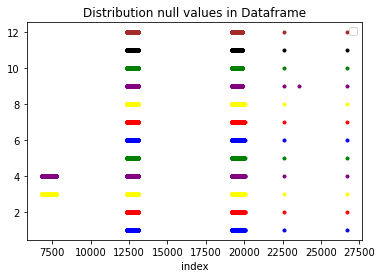

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure() #create the space of the plot
ax = fig.add_subplot(111) #allow define the amount of graphs in a plot
ax.scatter(x1, y1, color='blue', marker='.') #create scater plot
ax.scatter(x2, y2, color='red', marker='.')
ax.scatter(x3, y3, color='yellow', marker='.')
ax.scatter(x4, y4, color='purple', marker='.')
ax.scatter(x5, y5, color='green', marker='.')
ax.scatter(x6, y6, color='blue', marker='.')
ax.scatter(x7, y7, color='red', marker='.')
ax.scatter(x8, y8, color='yellow', marker='.')
ax.scatter(x9, y9, color='purple', marker='.')
ax.scatter(x10, y10, color='green', marker='.')
ax.scatter(x11, y11, color='black', marker='.')
ax.scatter(x12, y12, color='brown', marker='.')

#Legends
ax.set(title='Distribution null values in Dataframe', xlabel='index')
ax.legend(loc='best') 
plt.show()

In the plot, we can see the distribution of the null values. The data show that exists one distribution uniform of the null values in ranges. That means the data have empty in broad ranges. Then, is most convenient drop these null values:

In [40]:
#drop null values of data that we don't want to fill
print("we have", df_stats.shape[0], "records in the dataframe of stats before drop rows")
df_stats = df_stats.dropna(subset=['hs','AS','hf',"hst","ast",'af','hc','ac','hy','ay','hr','ar'])
print("we have", df_stats.shape[0], "records in the dataframe of stats after drop rows")

we have 28133 records in the dataframe of stats before drop rows
we have 25752 records in the dataframe of stats after drop rows


Now we can do the previous steps to another dataframes:

In [43]:
df_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13280 entries, 0 to 13279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   hometeam    13280 non-null  object        
 1   awayteam    13280 non-null  object        
 2   attendance  13252 non-null  float64       
 3   DATE        13280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 415.1+ KB


In the dataframe of attendance, we have only eight records with null values. However, when we clean the dataframe of the records of attendance and stats together, the records without null values are less:

In [44]:
print("we have", df_stats_attendance.shape[0], "records in the dataframe of attendance and stats before drop rows")
df_stats_attendance = df_stats_attendance.drop("referee", axis=1)
df_stats_attendance = df_stats_attendance.dropna(subset=['hthg','htag','htr','hs','AS','hf',"hst","ast",'af','hc',
                                                         'ac','hy','ay','hr','ar','attendance'])
print("we have", df_stats_attendance.shape[0],"records in the dataframe of attendance and stats after drop rows")

we have 11451 records in the dataframe of attendance and stats before drop rows
we have 10914 records in the dataframe of attendance and stats after drop rows


In [45]:
print("we have",df_stats_market.shape[0], "records in the dataframe of market value and stats before drop rows")
df_stats_market = df_stats_market.drop("referee", axis=1)
df_stats_market = df_stats_market.dropna(subset=['hthg','htag','htr','hs','AS','hf',"hst","ast",'af','hc','ac','hy','ay','hr',
                                                 'ar','market value hometeam','market value awayteam'])
print("we have", df_stats_market.shape[0], "records in the dataframe of market value and stats after drop rows")

we have 28147 records in the dataframe of market value and stats before drop rows
we have 24571 records in the dataframe of market value and stats after drop rows


In [46]:
print("we have", df_stats_attendance_market.shape[0], "records in the dataframe of stats, attendance and market value before drop rows")
df_stats_attendance_market = df_stats_attendance_market.drop("referee", axis=1)
df_stats_attendance_market = df_stats_attendance_market.dropna()
print("we have", df_stats_attendance_market.shape[0], "records in the dataframe of stats, attendance and market value after drop rows")

we have 11458 records in the dataframe of stats, attendance and market value before drop rows
we have 9953 records in the dataframe of stats, attendance and market value after drop rows


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
# 3. Models building

In this step, we will create models of prediction with the dataframes fixed in the previous steps, and compare themselves. Before creating these models, we can explore the data and get insights useful to the models building.

## 3.1 Exploratory Data Analysis

One good way to find out insights into the data is to plot them. In the next lines code, we will plot the data using as dependent variable "y" the result of the football matches.

First, we transform variables of the results in the matches (column "ftr"). To analyze the data, we transform these categorical variables into numerical, considering the results for the Home team. Then we transform them like following:

H=3 (In football the winner get three points)  
D=1 (In football a draw give two points)  
A=0 (In football the loser don't get points)  

The following line transforms the variables:

In [47]:
df_stats['ftr'] = df_stats['ftr'].replace(['H','D','A'], ['3','1','0']).astype(int)
df_stats_attendance['ftr'] = df_stats_attendance['ftr'].replace(['H','D','A',], ['3','1','0']).astype(int)
df_stats_market['ftr'] = df_stats_market['ftr'].replace(['H','D','A'], ['3','1','0']).astype(int)
df_stats_attendance_market['ftr'] = df_stats_attendance_market['ftr'].replace(['H','D','A'], ['3','1','0']).astype(int)

In [48]:
#repeat previous code to variable htr= half time result
df_stats['htr'] = df_stats['htr'].replace(['H','D','A'], ['3','1','0']).astype(int)
df_stats_attendance['htr'] = df_stats_attendance['htr'].replace(['H','D','A'], ['3','1','0']).astype(int)
df_stats_market['htr'] = df_stats_market['htr'].replace(['H','D','A'], ['3','1','0']).astype(int)
df_stats_attendance_market['htr'] = df_stats_attendance_market['htr'].replace(['H','D','A'], ['3','1','0']).astype(int)

Now, we'll plot the records of df_stats:

Text(0.5, 0, 'half time away goals')

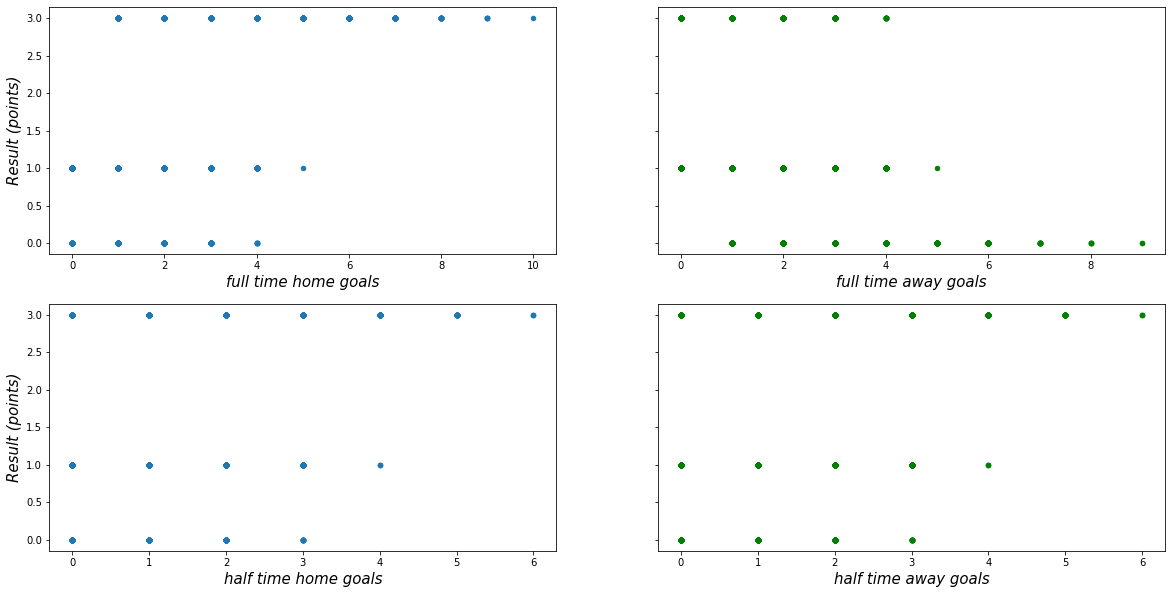

In [49]:
#plot the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]

fig, axs = plt.subplots(2, 2,sharey=True)

df_stats.plot(kind='scatter',x="fthg",y="ftr",ax=axs[0][0],fontsize=10)
axs[0][0].set_xlabel('full time home goals',fontsize=15,fontstyle='italic')
axs[0][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="ftag",y="ftr",ax=axs[0][1],color='green',fontsize=10)
axs[0][1].set_xlabel('full time away goals',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="hthg",y="ftr",ax=axs[1][0],fontsize=10)
axs[1][0].set_xlabel('half time home goals',fontsize=15,fontstyle='italic')
axs[1][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="hthg",y="ftr",ax=axs[1][1],color='green',fontsize=10)
axs[1][1].set_xlabel('half time away goals',fontsize=15,fontstyle='italic')

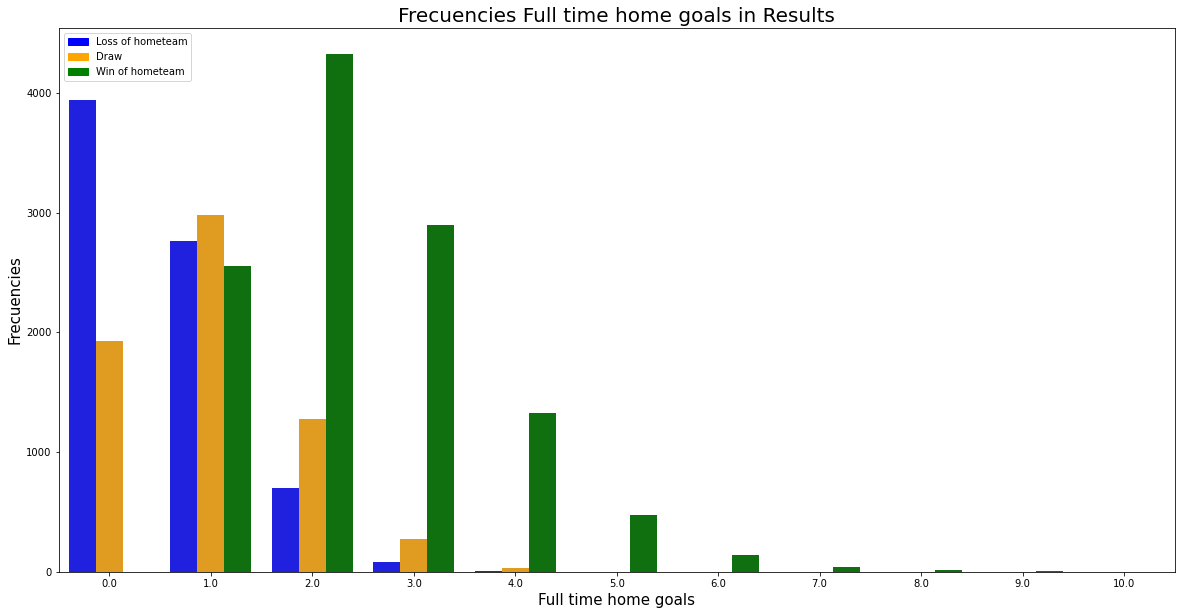

In [50]:
import seaborn as sns
import matplotlib.patches as mpatches

palette = ["blue","orange","green"]
sns.set_palette(palette)

sns.countplot(x='fthg',data=df_stats,hue='ftr')
plt.title("Frecuencies Full time home goals in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Full time home goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="Loss of hometeam")
orange_patch = mpatches.Patch(color='orange', label="Draw")
green_patch = mpatches.Patch(color='green', label="Win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

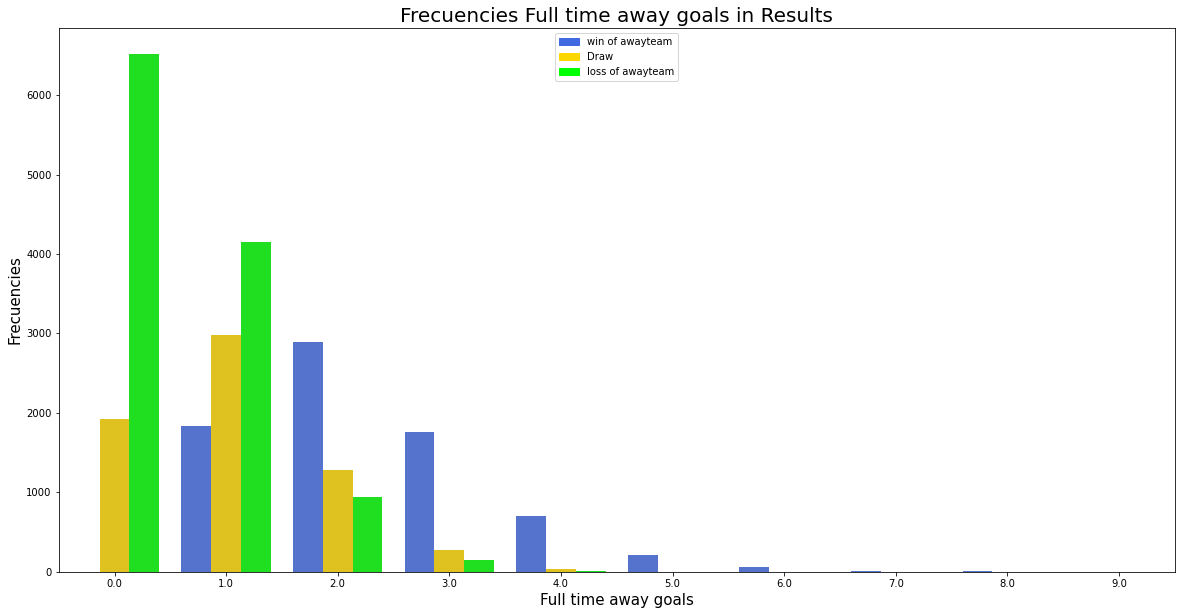

In [51]:
palette = ["royalblue","gold","lime"]
sns.set_palette(palette)

sns.countplot(x='ftag',data=df_stats,hue='ftr')
plt.title("Frecuencies Full time away goals in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Full time away goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='royalblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='gold', label="Draw")
green_patch = mpatches.Patch(color='lime', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

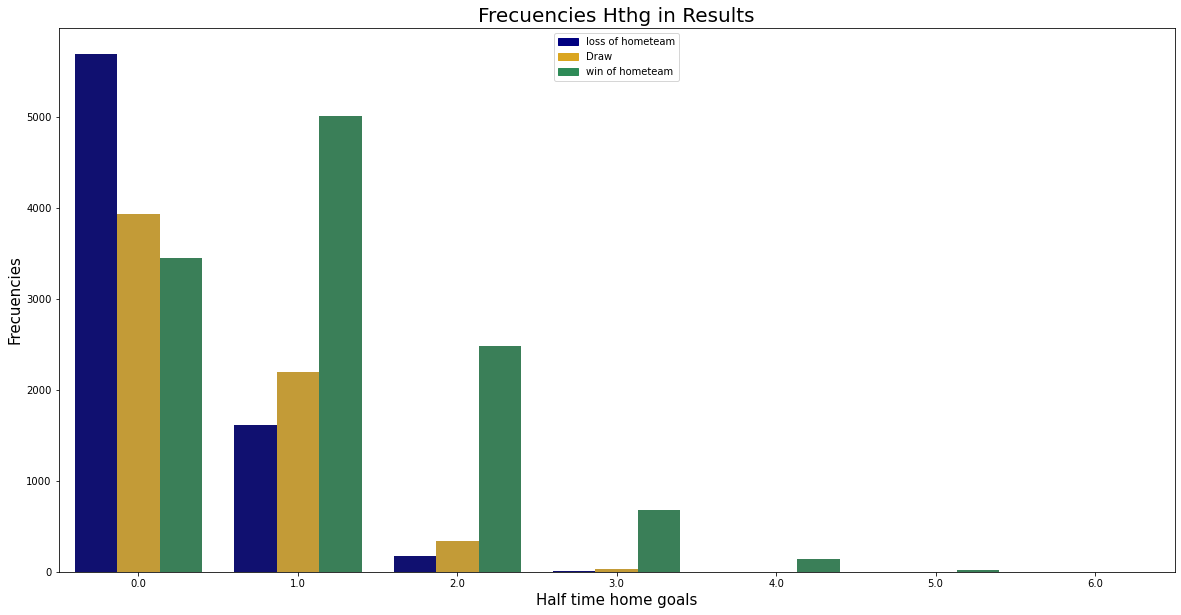

In [52]:
palette = ["navy","goldenrod","seagreen"]
sns.set_palette(palette)

sns.countplot(x='hthg',data=df_stats,hue='ftr')
plt.title("Frecuencies Hthg in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Half time home goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='navy', label="loss of hometeam")
orange_patch = mpatches.Patch(color='goldenrod', label="Draw")
green_patch = mpatches.Patch(color='seagreen', label="win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

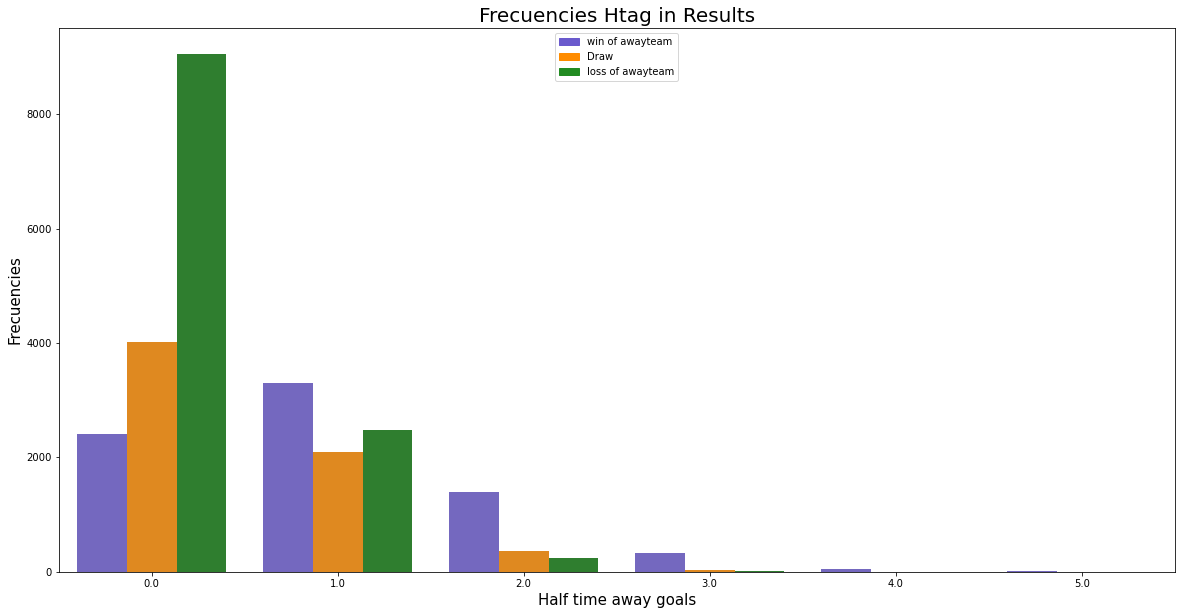

In [53]:
palette = ["slateblue","darkorange","forestgreen"]
sns.set_palette(palette)

sns.countplot(x='htag',data=df_stats,hue='ftr')
plt.title("Frecuencies Htag in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Half time away goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='slateblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='darkorange', label="Draw")
green_patch = mpatches.Patch(color='forestgreen', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

**If we analyze carefully the previous graphs we can get the following insights:**

1. When the team scores more goals, most probability of winning the match. 


2. Scoring two or more goals for the home team in the full-time match, the probability of winning the match is very high. Whereas, for the away team with two goals, the probability of winning is less. 


3. When the home team scores one goal in the first half has a pretty probability of winning the match. Whereas, the away team must score two goals to have a good probability of winning.

Now, we can explore the data of shots:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'away team shots on target')

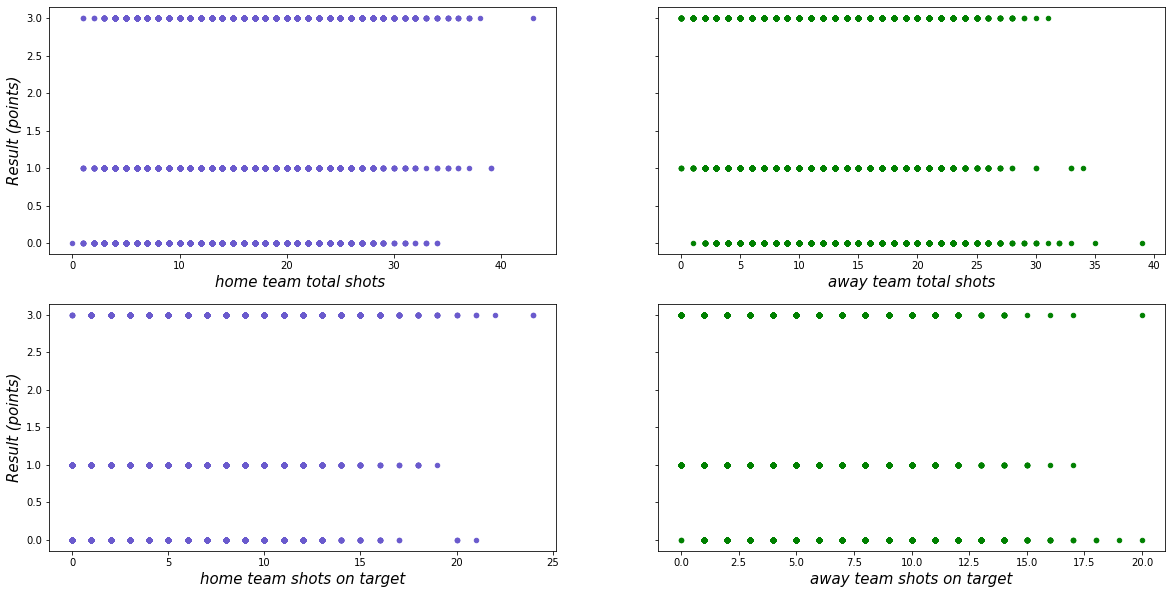

In [54]:
plt.rcParams['figure.figsize'] = [20, 10]

fig, axs = plt.subplots(2, 2,sharey=True)

df_stats.plot(kind='scatter',x="hs",y="ftr",ax=axs[0][0],fontsize=10)
axs[0][0].set_xlabel('home team total shots ',fontsize=15,fontstyle='italic')
axs[0][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="AS",y="ftr",ax=axs[0][1],color='green',fontsize=10)
axs[0][1].set_xlabel('away team total shots',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="hst",y="ftr",ax=axs[1][0],fontsize=10)
axs[1][0].set_xlabel('home team shots on target',fontsize=15,fontstyle='italic')
axs[1][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="ast",y="ftr",ax=axs[1][1],color='green',fontsize=10)
axs[1][1].set_xlabel('away team shots on target',fontsize=15,fontstyle='italic')

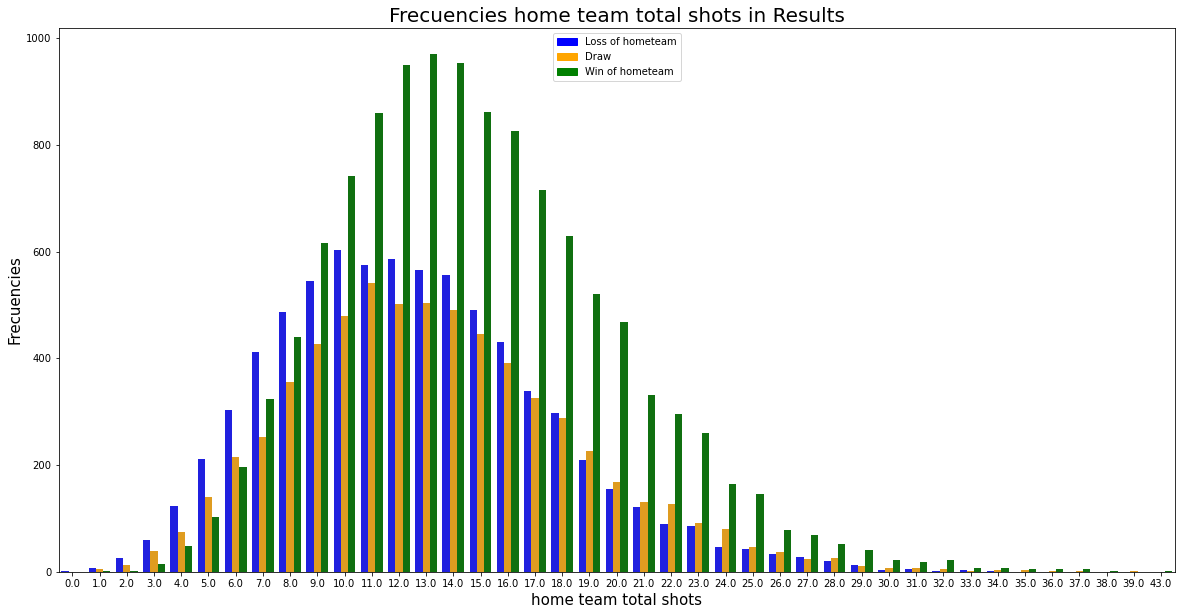

In [55]:
palette = ["blue","orange","green"]
sns.set_palette(palette)

sns.countplot(x='hs',data=df_stats,hue='ftr')
plt.title("Frecuencies home team total shots in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("home team total shots",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="Loss of hometeam")
orange_patch = mpatches.Patch(color='orange', label="Draw")
green_patch = mpatches.Patch(color='green', label="Win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

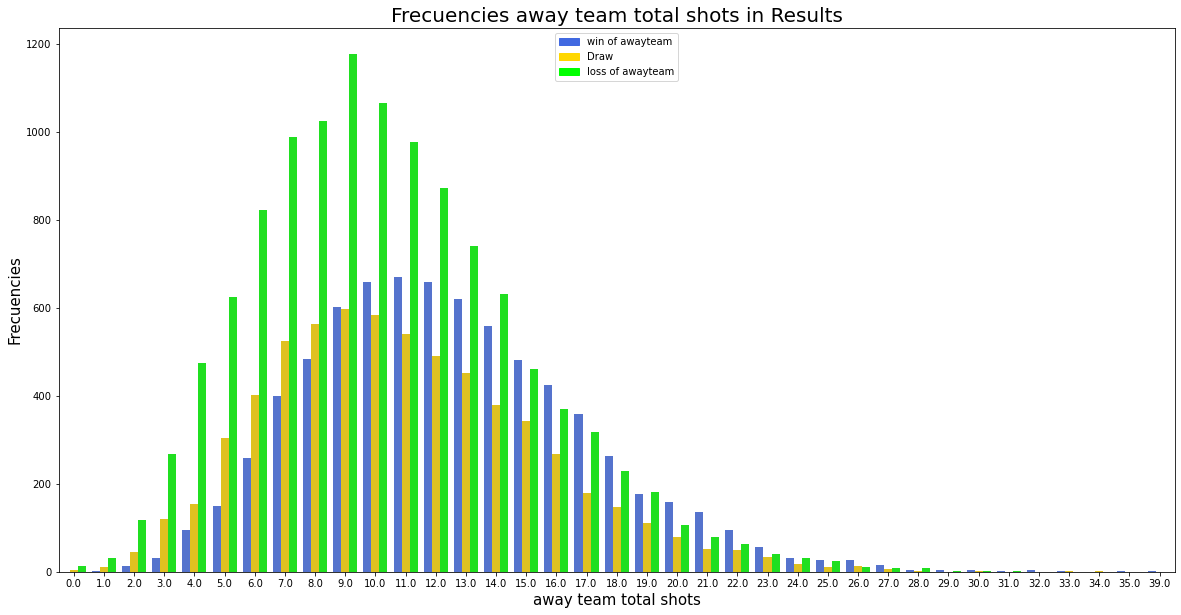

In [56]:
palette = ["royalblue","gold","lime"]
sns.set_palette(palette)

sns.countplot(x='AS',data=df_stats,hue='ftr')
plt.title("Frecuencies away team total shots in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("away team total shots",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='royalblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='gold', label="Draw")
green_patch = mpatches.Patch(color='lime', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

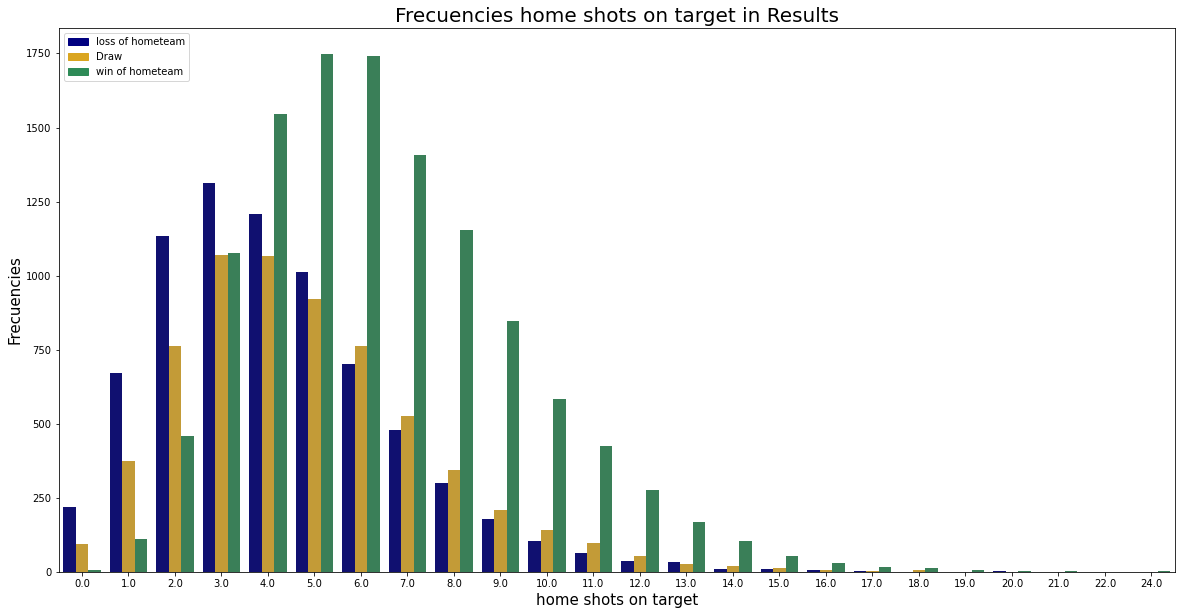

In [57]:
palette = ["navy","goldenrod","seagreen"]
sns.set_palette(palette)

sns.countplot(x='hst',data=df_stats,hue='ftr')
plt.title("Frecuencies home shots on target in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("home shots on target",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='navy', label="loss of hometeam")
orange_patch = mpatches.Patch(color='goldenrod', label="Draw")
green_patch = mpatches.Patch(color='seagreen', label="win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

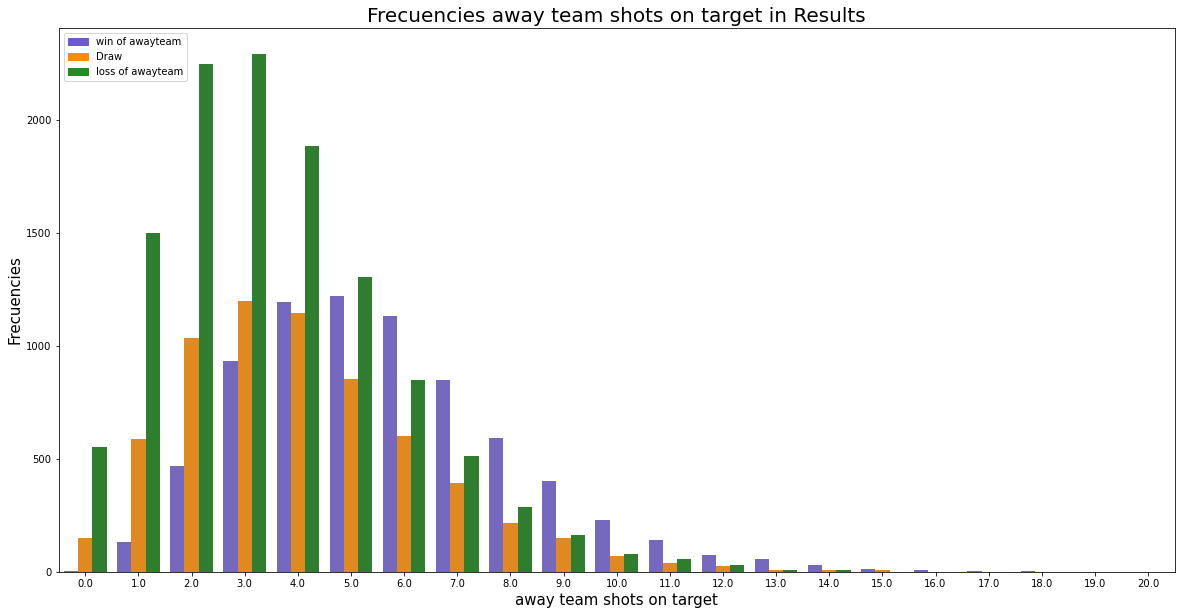

In [58]:
palette = ["slateblue","darkorange","forestgreen"]
sns.set_palette(palette)

sns.countplot(x='ast',data=df_stats,hue='ftr')
plt.title("Frecuencies away team shots on target in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("away team shots on target",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='slateblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='darkorange', label="Draw")
green_patch = mpatches.Patch(color='forestgreen', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

**About the data of shots we can get the following insights:**

1. When the team does more shots, most probability of winning the match. 


2. Doing 10 or more total shots for the home team, the probability of winning the match is better. Whereas, for the away team with two goals, the probability of winning is better when doing 20 or more shots. 


3. When the home team does more than five shots on target has a pretty probability of winning the match. Whereas, the away team must do six shots on target to have a good probability of winning.

We can see the data of fouls:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'away team fouls')

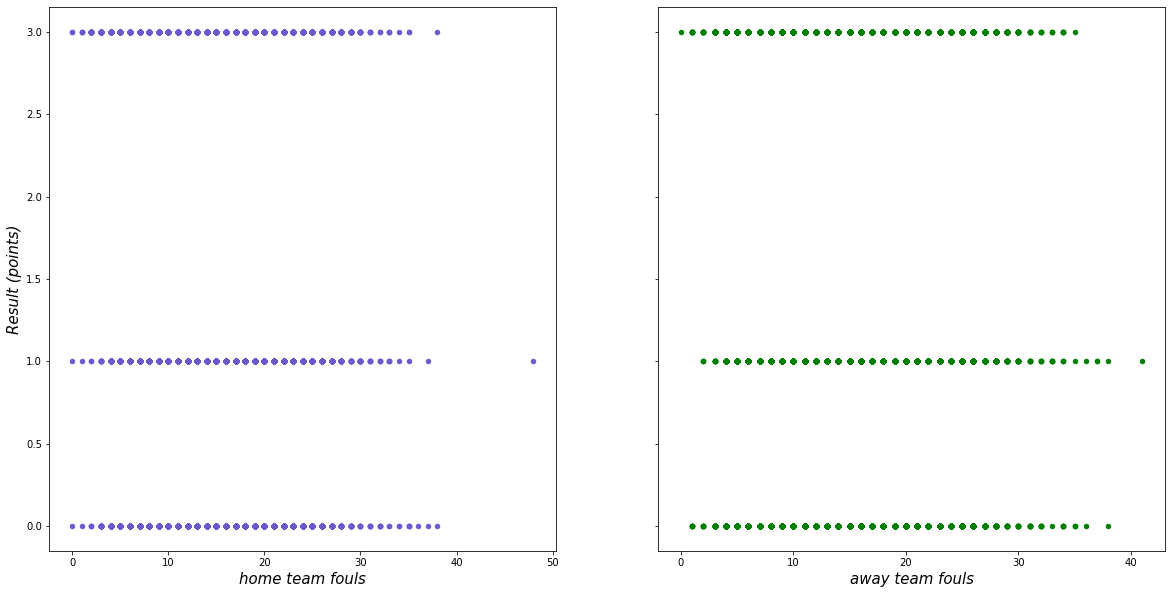

In [59]:
plt.rcParams['figure.figsize'] = [20, 10]

fig, axs = plt.subplots(1, 2,sharey=True)

df_stats.plot(kind='scatter',x="hf",y="ftr",ax=axs[0],fontsize=10)
axs[0].set_xlabel('home team fouls',fontsize=15,fontstyle='italic')
axs[0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="af",y="ftr",ax=axs[1],color='green',fontsize=10)
axs[1].set_xlabel('away team fouls',fontsize=15,fontstyle='italic')

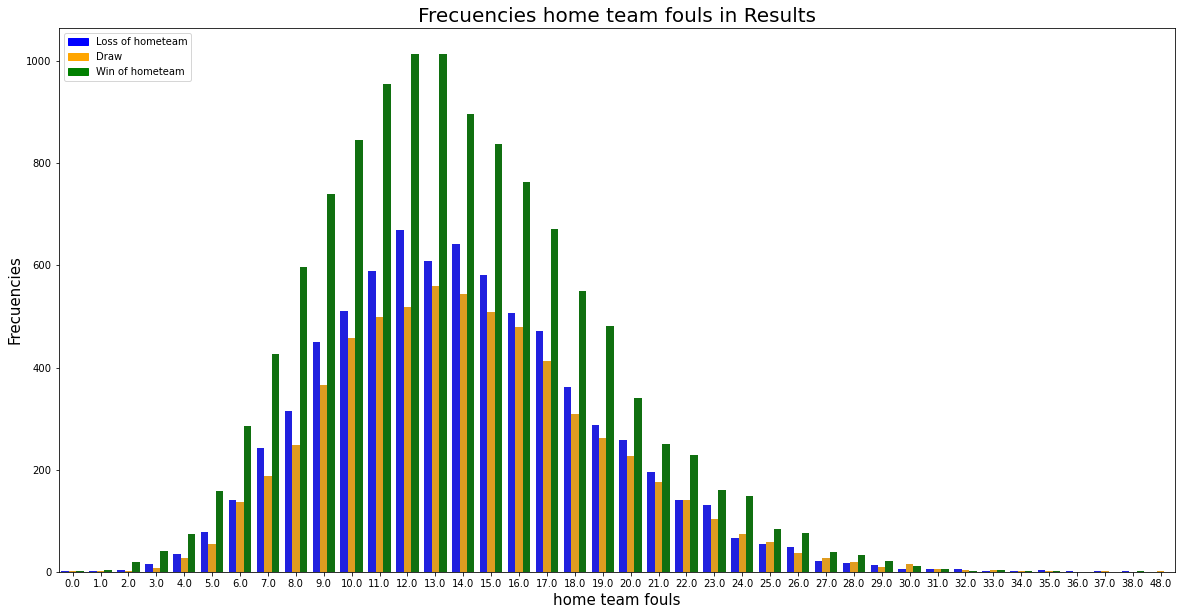

In [60]:
palette = ["blue","orange","green"]
sns.set_palette(palette)

sns.countplot(x='hf',data=df_stats,hue='ftr')
plt.title("Frecuencies home team fouls in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("home team fouls",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="Loss of hometeam")
orange_patch = mpatches.Patch(color='orange', label="Draw")
green_patch = mpatches.Patch(color='green', label="Win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

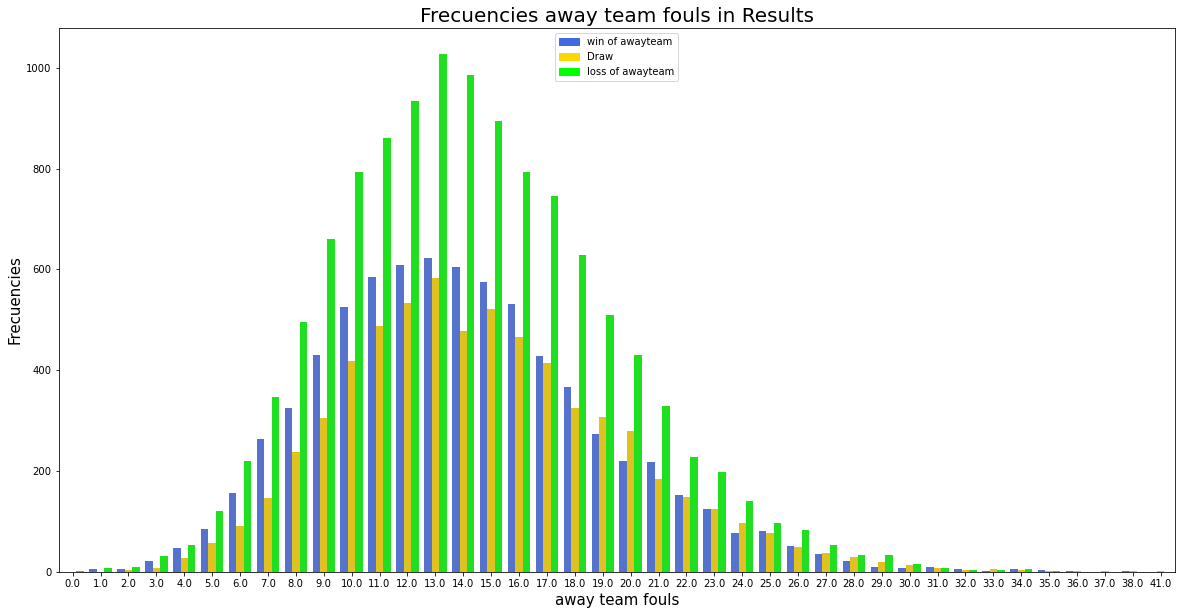

In [61]:
palette = ["royalblue","gold","lime"]
sns.set_palette(palette)

sns.countplot(x='af',data=df_stats,hue='ftr')
plt.title("Frecuencies away team fouls in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("away team fouls",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='royalblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='gold', label="Draw")
green_patch = mpatches.Patch(color='lime', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

**In the previous plots, we can't see a clear relationship between the number of fouls and the results. The plots show always a major percent of local team victories, probably due to the advantage local.** 

Let's see the data of corners:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'away team corners')

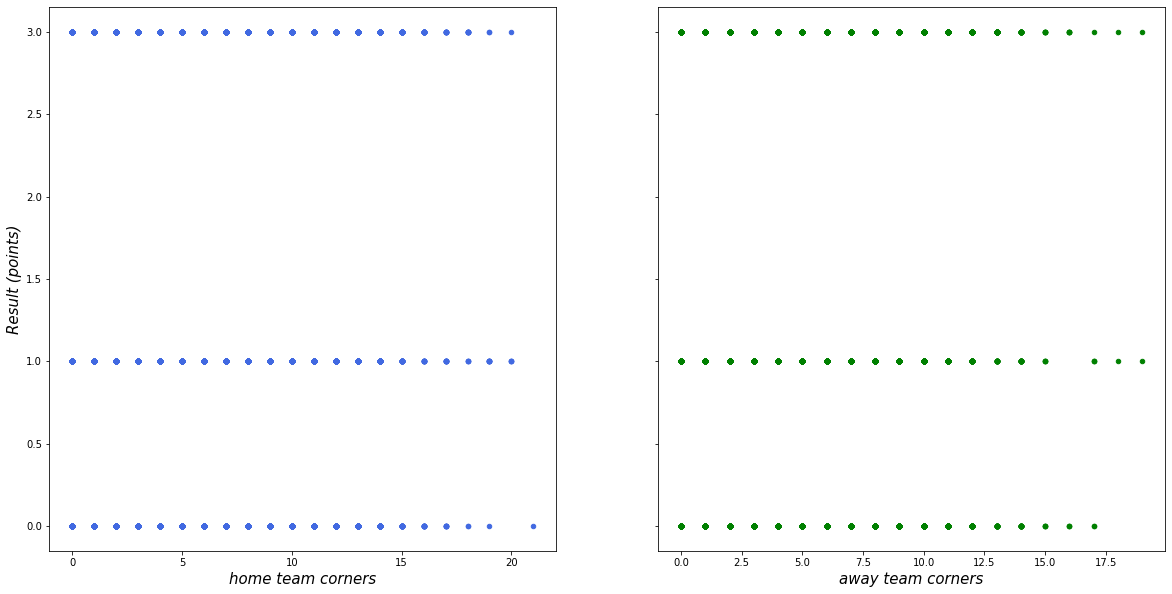

In [62]:
plt.rcParams['figure.figsize'] = [20, 10]

fig, axs = plt.subplots(1, 2,sharey=True)

df_stats.plot(kind='scatter',x="hc",y="ftr",ax=axs[0],fontsize=10)
axs[0].set_xlabel('home team corners',fontsize=15,fontstyle='italic')
axs[0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="ac",y="ftr",ax=axs[1],color='green',fontsize=10)
axs[1].set_xlabel('away team corners',fontsize=15,fontstyle='italic')

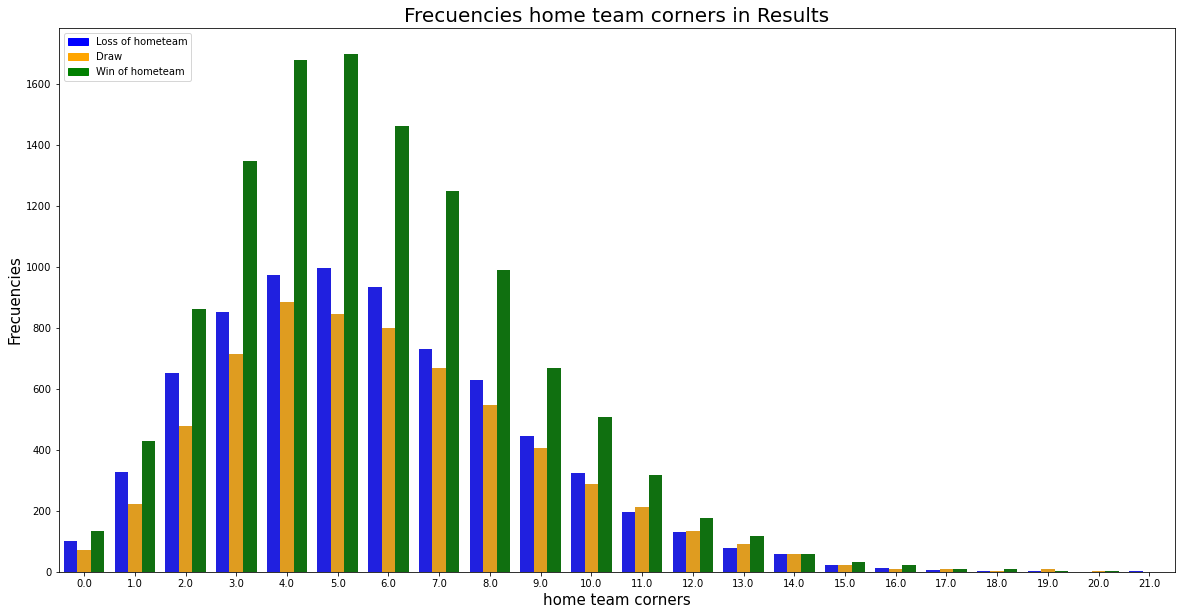

In [63]:
palette = ["blue","orange","green"]
sns.set_palette(palette)

sns.countplot(x='hc',data=df_stats,hue='ftr')
plt.title("Frecuencies home team corners in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("home team corners",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="Loss of hometeam")
orange_patch = mpatches.Patch(color='orange', label="Draw")
green_patch = mpatches.Patch(color='green', label="Win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

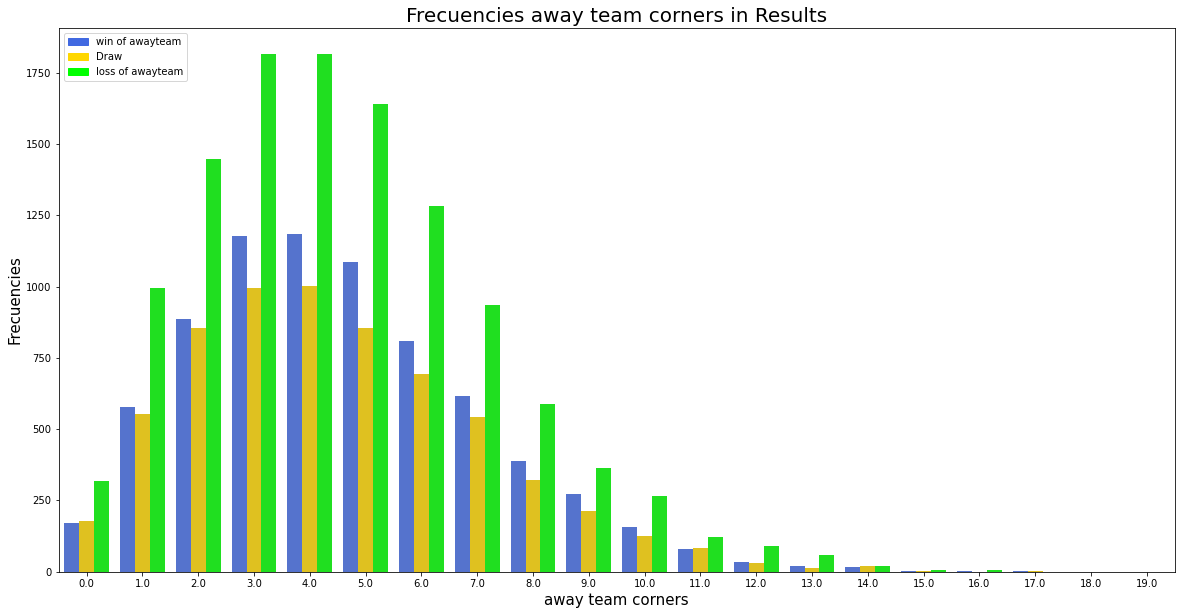

In [64]:
palette = ["royalblue","gold","lime"]
sns.set_palette(palette)

sns.countplot(x='ac',data=df_stats,hue='ftr')
plt.title("Frecuencies away team corners in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("away team corners",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='royalblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='gold', label="Draw")
green_patch = mpatches.Patch(color='lime', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

**Alike the data of fouls, we can't see a clear relationship between the number of corners and the results. The plots show always a major percent of local team victories, probably due to the advantage local.** 

Now, we will plot the data of cards:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'away team red cards')

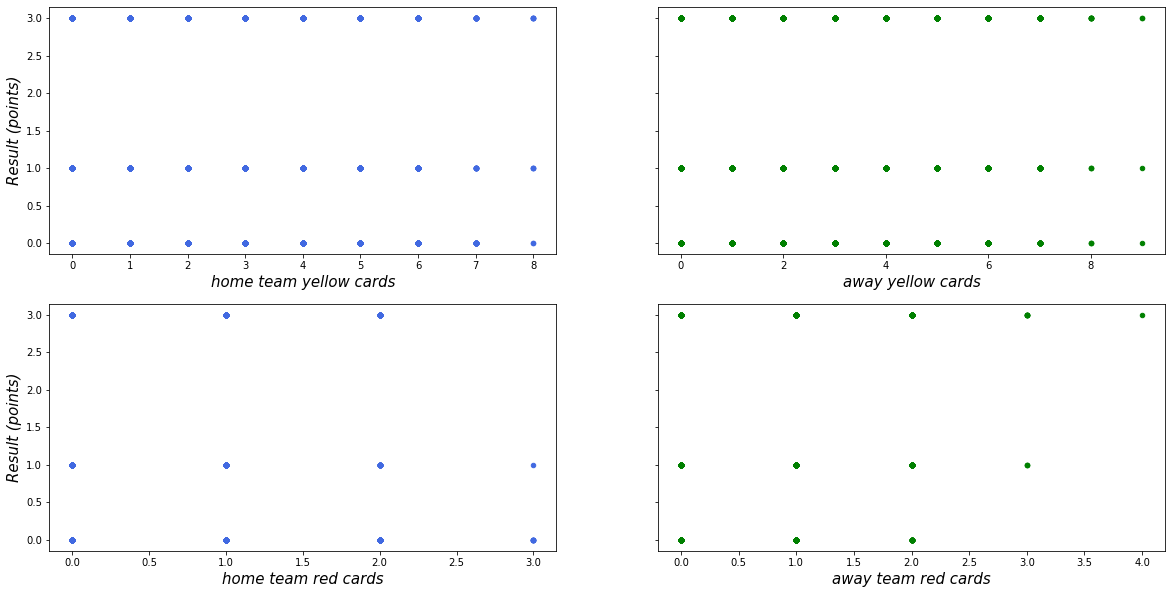

In [65]:
plt.rcParams['figure.figsize'] = [20, 10]

fig, axs = plt.subplots(2, 2,sharey=True)

df_stats.plot(kind='scatter',x="hy",y="ftr",ax=axs[0][0],fontsize=10)
axs[0][0].set_xlabel('home team yellow cards',fontsize=15,fontstyle='italic')
axs[0][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="ay",y="ftr",ax=axs[0][1],color='green',fontsize=10)
axs[0][1].set_xlabel('away yellow cards',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="hr",y="ftr",ax=axs[1][0],fontsize=10)
axs[1][0].set_xlabel('home team red cards',fontsize=15,fontstyle='italic')
axs[1][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="ar",y="ftr",ax=axs[1][1],color='green',fontsize=10)
axs[1][1].set_xlabel('away team red cards',fontsize=15,fontstyle='italic')

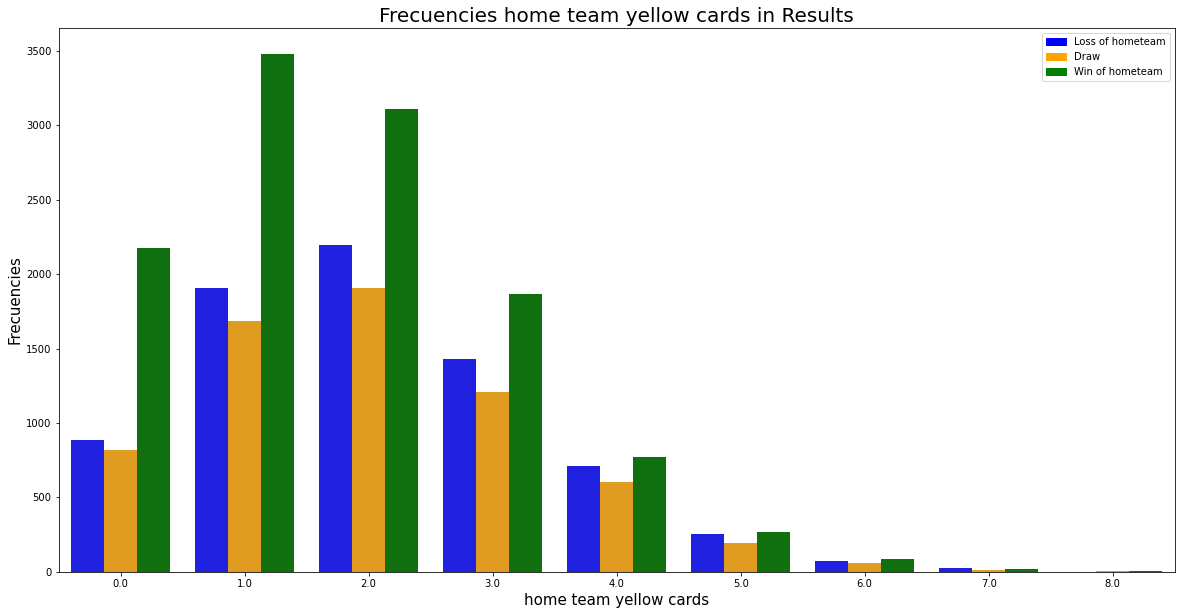

In [66]:
palette = ["blue","orange","green"]
sns.set_palette(palette)

sns.countplot(x='hy',data=df_stats,hue='ftr')
plt.title("Frecuencies home team yellow cards in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("home team yellow cards",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="Loss of hometeam")
orange_patch = mpatches.Patch(color='orange', label="Draw")
green_patch = mpatches.Patch(color='green', label="Win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

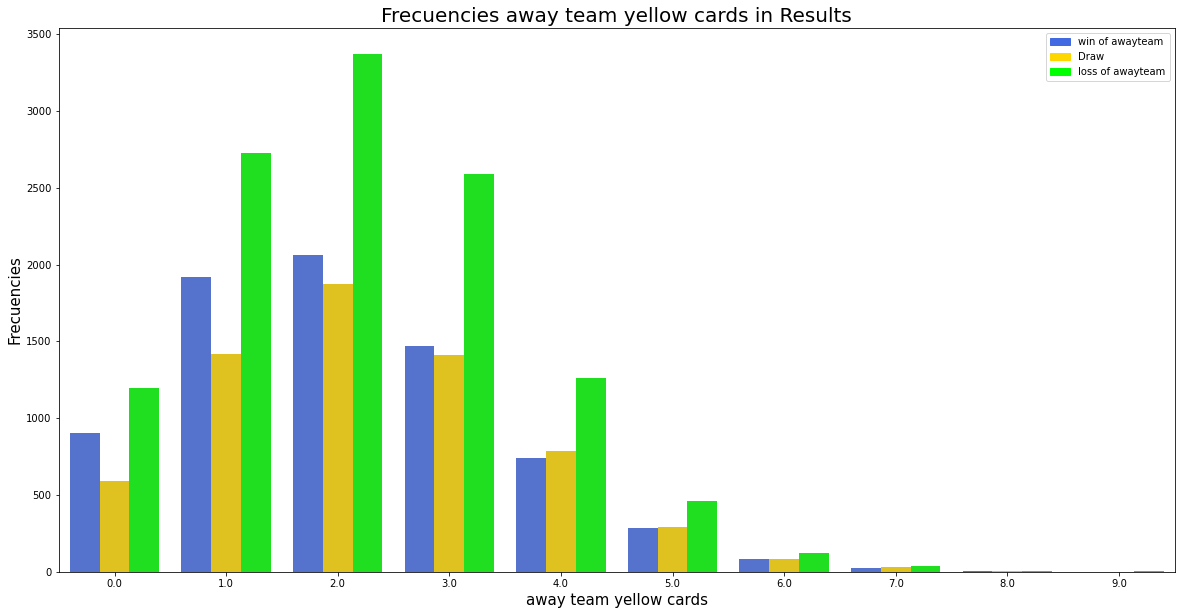

In [67]:
palette = ["royalblue","gold","lime"]
sns.set_palette(palette)

sns.countplot(x='ay',data=df_stats,hue='ftr')
plt.title("Frecuencies away team yellow cards in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("away team yellow cards",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='royalblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='gold', label="Draw")
green_patch = mpatches.Patch(color='lime', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

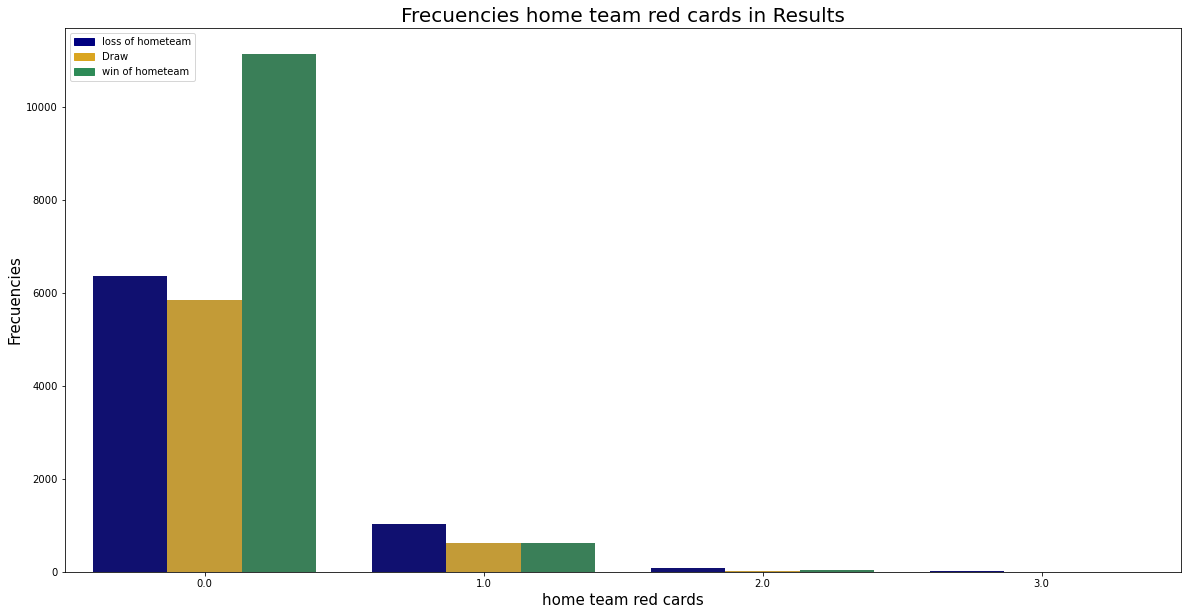

In [68]:
palette = ["navy","goldenrod","seagreen"]
sns.set_palette(palette)

sns.countplot(x='hr',data=df_stats,hue='ftr')
plt.title("Frecuencies home team red cards in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("home team red cards",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='navy', label="loss of hometeam")
orange_patch = mpatches.Patch(color='goldenrod', label="Draw")
green_patch = mpatches.Patch(color='seagreen', label="win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

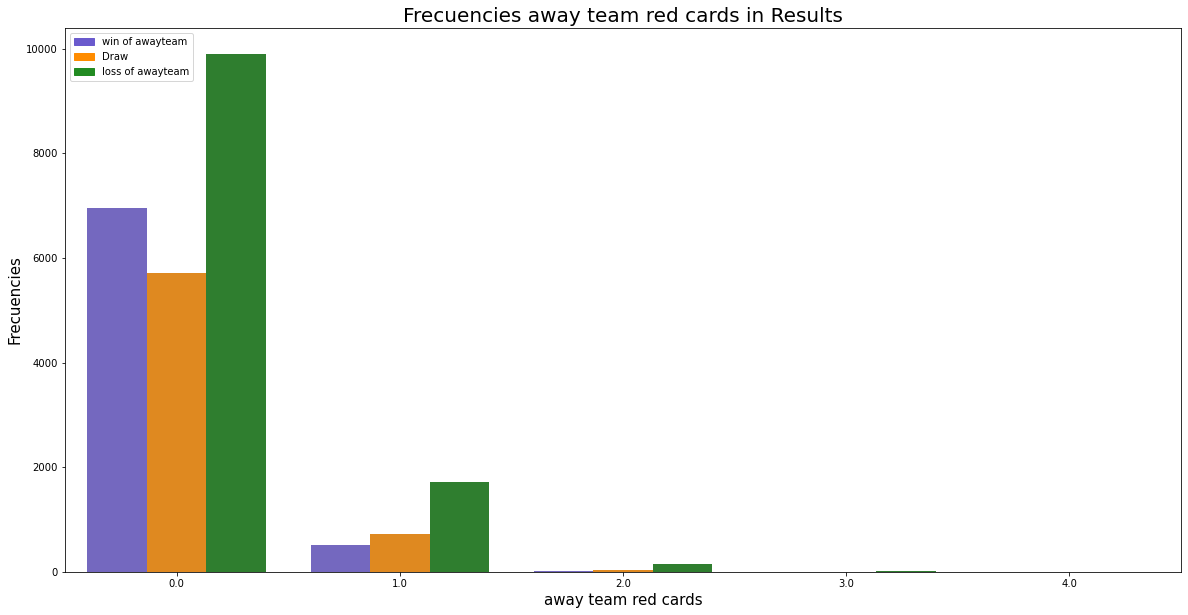

In [69]:
palette = ["slateblue","darkorange","forestgreen"]
sns.set_palette(palette)

sns.countplot(x='ar',data=df_stats,hue='ftr')
plt.title("Frecuencies away team red cards in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("away team red cards",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='slateblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='darkorange', label="Draw")
green_patch = mpatches.Patch(color='forestgreen', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

With the yellow cards, we can't see clearly one correlation. However, the red cards show one relationship, when the team has red cards the results are worse. This occurs because in football one red card is equal to one player minus.  

**In the case of the variables attendance and market value of the teams, in another notebooks we already verified that these variables affect the results of the matches.**

## 3.2 Feature Engineering

Feature Engineering is the process in which we create and select the best variables for our models. In the previous steps we can find out that the variables of goals and shots can be good predictors, whereas, in variables of fouls, corners and yellow cards is difficult to see one relationship. In this step we will do the following:

1. We will create features that we know can be worth it.


2. We will find out which the best features using numeric methods.

### 3.2.1 Creating Features

One variable broadly know is Pythagorean expectation wich is an idea devised by the famous baseball analyst, Bill James, but it can in fact be applied to any sport. The Pythagorean expectation can be described thus: in any season, the percentage of games won will be proportional to the square of total runs/points/goals scored by the team *squared* divided by the sum of total runs/points/goals scored by the team *squared* plus total runs/points/goals conceded by the team *squared*.

or *pyth = T<sub>F</sub><sup>2</sup> / ( T<sub>F</sub><sup>2</sup> + T<sub>A</sub><sup>2</sup> )*

Where T<sub>F</sub> is runs/points/goals scored and T<sub>A</sub> is runs/points/goals conceded. 

In our case, the expression will be:  
    
    
<center>pyth=G<sub>F</sub><sup>2</sup> / ( G<sub>F</sub><sup>2</sup> + G<sub>A</sub><sup>2</sup> )

G<sub>F</sub>: Goals favor  
G<sub>F</sub>: Goals against       
    
          
Another features that could be useful are the following rates:  
      
Shots On Target/ Total Shots  
Goals favor/Shots On Target  
Goals favor/Total Shots    
              
In the next code we will create these features:


In [70]:
#we will use the dataframe that we create with all features selected.

#pythagorean expectation:
import numpy as np

df_stats_attendance_market['pyth_hometeam']=np.where(df_stats_attendance_market['fthg']==0,0,df_stats_attendance_market['fthg']**2/(df_stats_attendance_market['fthg']**2+df_stats_attendance_market['ftag']))
df_stats_attendance_market['pyth_awayteam']=np.where(df_stats_attendance_market['ftag']==0,0,df_stats_attendance_market['ftag']**2/(df_stats_attendance_market['ftag']**2+df_stats_attendance_market['fthg']))

#another features:
df_stats_attendance_market['aiming_hometeam']=np.where(df_stats_attendance_market['hs']==0,0,df_stats_attendance_market['hst']/df_stats_attendance_market['hs'])
df_stats_attendance_market['aiming_awayteam']=np.where(df_stats_attendance_market['AS']==0,0,df_stats_attendance_market['ast']/df_stats_attendance_market['AS'])
df_stats_attendance_market['efficacy_hometeam']=np.where(df_stats_attendance_market['hst']==0,0,df_stats_attendance_market['fthg']/df_stats_attendance_market['hst'])
df_stats_attendance_market['efficacy_awayteam']=np.where(df_stats_attendance_market['ast']==0,0,df_stats_attendance_market['ftag']/df_stats_attendance_market['ast'])
df_stats_attendance_market['efficiency_hometeam']=np.where(df_stats_attendance_market['hs']==0,0,df_stats_attendance_market['fthg']/df_stats_attendance_market['hs'])
df_stats_attendance_market['efficiency_awayteam']=np.where(df_stats_attendance_market['AS']==0,0,df_stats_attendance_market['ftag']/df_stats_attendance_market['AS'])

df_stats_attendance_market.head()

,hometeam,awayteam,attendance,DATE,season,market value hometeam,market value awayteam,div,fthg,ftag,...,hr,ar,pyth_hometeam,pyth_awayteam,aiming_hometeam,aiming_awayteam,efficacy_hometeam,efficacy_awayteam,efficiency_hometeam,efficiency_awayteam
586,Liverpool,Wigan,44098.0,2005-12-03,2005,187400000.0,36200000.0,E0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.750000,0.600000,0.250000,0.000000,0.187500,0.000000
587,Blackburn,Everton,22064.0,2005-12-03,2005,70700000.0,109780000.0,E0,0.0,2.0,...,1.0,0.0,0.0,1.0,0.466667,0.625000,0.000000,0.400000,0.000000,0.250000
588,Bolton,Arsenal,26792.0,2005-12-03,2005,65900000.0,217950000.0,E0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.900000,0.375000,0.222222,0.000000,0.200000,0.000000
589,Chelsea,Middlesbrough,41666.0,2005-12-03,2005,352180000.0,94630000.0,E0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.529412,0.500000,0.111111,0.000000,0.058824,0.000000
590,Newcastle,Aston Villa,52267.0,2005-12-03,2005,141200000.0,100830000.0,E0,1.0,1.0,...,0.0,0.0,0.5,0.5,0.250000,0.666667,0.500000,0.166667,0.125000,0.111111


### 3.2.2 Find out the best features

One method very useful to find out which is the best features is the Mutual Information method. 

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory, there's no upper bound to what MI can be. In practice, though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly) (see https://www.kaggle.com/ryanholbrook/mutual-information). 

In the following code, we will use this method:

In [71]:
#create variables for MI method.
x=df_stats_attendance_market[['attendance',
       'market value hometeam', 'market value awayteam','fthg',
       'ftag','hthg', 'htag', 'hs', 'AS', 'hst', 'ast',
       'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'pyth_hometeam',
       'pyth_awayteam', 'aiming_hometeam', 'aiming_awayteam',
       'efficacy_hometeam', 'efficacy_awayteam', 'efficiency_hometeam',
       'efficiency_awayteam']]

y=df_stats_attendance_market[['ftr']]

In [72]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(x, y):
    mi_scores = mutual_info_classif(x, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y)
mi_scores

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


pyth_hometeam            0.890164
pyth_awayteam            0.848921
fthg                     0.309169
efficiency_hometeam      0.271836
ftag                     0.271016
efficacy_hometeam        0.250376
efficiency_awayteam      0.233856
efficacy_awayteam        0.222128
hthg                     0.118801
htag                     0.092543
ast                      0.070155
hst                      0.068722
aiming_hometeam          0.066583
market value awayteam    0.055901
market value hometeam    0.054961
aiming_awayteam          0.041846
AS                       0.020422
af                       0.016209
hs                       0.009943
hy                       0.008762
ar                       0.006030
attendance               0.004101
ac                       0.002700
ay                       0.002252
hf                       0.001999
hr                       0.001102
hc                       0.000000
Name: MI Scores, dtype: float64

The list shows that the variables that have the most relationships with the results are the features created: Pythagorean expectation, efficiency, efficacy, and the goals of the matches. Further, we can see that the variables belonging to the home team have a better score, due to the advantage local. The attendance has a score low, though is similar to the scores of red cards, that we know have high influent in the match football results.

Before choosing our features to use, we must consider two things:

1. Multycollinearity

2. Data Leakage

### 3.2.3 Multycollinearity

Multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. (see https://en.wikipedia.org/wiki/Multicollinearity). For this reason, we must verify the multicollinearity between our features:

In [73]:
#we will create one correlation matrix to check the multicollinearity
x.corr()

,attendance,market value hometeam,market value awayteam,fthg,ftag,hthg,htag,hs,AS,hst,...,hr,ar,pyth_hometeam,pyth_awayteam,aiming_hometeam,aiming_awayteam,efficacy_hometeam,efficacy_awayteam,efficiency_hometeam,efficiency_awayteam
attendance,1.000000,0.287816,-0.045509,0.163847,-0.071658,0.107845,-0.049860,0.197404,-0.085243,0.217322,...,-0.041339,-0.007028,0.134179,-0.115010,0.098008,0.045862,0.022191,-0.059388,0.055663,-0.040046
market value hometeam,0.287816,1.000000,0.143395,0.254012,-0.124059,0.178584,-0.092930,0.271251,-0.193187,0.221445,...,-0.036825,-0.033326,0.207519,-0.175891,0.037527,-0.054701,0.092301,-0.029218,0.104578,-0.043295
market value awayteam,-0.045509,0.143395,1.000000,-0.171768,0.240877,-0.129941,0.171250,-0.225849,0.252200,-0.217713,...,0.006087,-0.033979,-0.222595,0.236007,-0.086660,0.038463,-0.043824,0.099953,-0.068882,0.113416
fthg,0.163847,0.254012,-0.171768,1.000000,-0.076500,0.686455,-0.032469,0.282372,-0.098414,0.476116,...,-0.082039,0.092423,0.750777,-0.365351,0.364982,-0.027314,0.655140,-0.018505,0.801145,-0.036150
ftag,-0.071658,-0.124059,0.240877,-0.076500,1.000000,-0.064505,0.680951,-0.085077,0.310978,-0.095094,...,0.128990,-0.062520,-0.392536,0.808979,-0.043688,0.343672,-0.013972,0.684742,-0.038416,0.798582
hthg,0.107845,0.178584,-0.129941,0.686455,-0.064505,1.000000,-0.046209,0.113689,-0.010948,0.283867,...,-0.041560,0.040735,0.524601,-0.258156,0.277683,-0.047010,0.483444,-0.023046,0.604834,-0.056120
htag,-0.049860,-0.092930,0.171250,-0.032469,0.680951,-0.046209,1.000000,-0.003634,0.155472,-0.047309,...,0.073874,-0.024789,-0.254582,0.544841,-0.054634,0.253544,-0.001666,0.485893,-0.034282,0.575417
hs,0.197404,0.271251,-0.225849,0.282372,-0.085077,0.113689,-0.003634,1.000000,-0.297781,0.650747,...,-0.114609,0.099650,0.206376,-0.133224,-0.044711,0.003195,-0.129519,0.038256,-0.170628,0.041419
AS,-0.085243,-0.193187,0.252200,-0.098414,0.310978,-0.010948,0.155472,-0.297781,1.000000,-0.223424,...,0.120552,-0.102452,-0.157111,0.266964,-0.016198,-0.039179,0.052343,-0.052647,0.046322,-0.111639
hst,0.217322,0.221445,-0.217713,0.476116,-0.095094,0.283867,-0.047309,0.650747,-0.223424,1.000000,...,-0.101614,0.059526,0.368498,-0.212871,0.667157,0.170624,-0.113802,-0.061066,0.152764,-0.000445


The matrix confirms the dependency of the features created with the variables used in their calculate. Further, exists one correlation important between the total shots and target shots. These can be good predictors, so we must evaluate if there are that delete one them. Then, we'll calculate the variance inflation factor (VIF) (see https://en.wikipedia.org/wiki/Variance_inflation_factor).

* VIF = 1 : The variables don't have a correlation
* VIF < 5 : The variables have correlation lowly, these can be in the model.
* VIF > 5 : The variables have a high correlation

In [74]:
#we calculate VIF
import statsmodels.formula.api as smf

lm_shots_home = smf.ols(formula="hs~hst", data = x).fit()
r2_shots_home=lm_shots_home.rsquared
VIF_shots_home=1/(1-r2_shots_home)
VIF_shots_home

1.7345218580141024

In [75]:
lm_shots_away = smf.ols(formula="AS~ast", data = x).fit()
r2_shots_away=lm_shots_away.rsquared
VIF_shots_away=1/(1-r2_shots_away)
VIF_shots_away

1.7974759044915307

The estimator shows that correlation between the variables isn't enough to discard one of these features.

### 3.2.4 Data Leakage

Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

In other words, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate. (see https://www.kaggle.com/alexisbcook/data-leakage). 

In our variables, the only that we can have before the match are attendance and market value. However, we can consider that the teams will have one performance similar to their previous matches and verify the results on the models.

### 3.2.5 Variables selected

Considering the previous analysis, we will use the next variables:

1. pyth_hometeam (pythagorean expectation)         
2. pyth_awayteam (pythagorean expectation)          
3. ast (awayteam shots on target)                   
4. hst (hometeam shots on target)                   
5. market value hometeam    
6. market value awayteam    
7. AS (awayteam total shots)                      
8. hs (hometeam total shots)                       
9. attendance           

## 3.3 Create the models

Our aim is to create one model to predict the results and then compare the results with the odds of the bookmakers. Then, our model must retrieve predictions like probabilities considering three possible results ( win of home team, draw, win of away team). This problem is called **classification**. The models most used to solve this type of problem are:

1. Logistic Regression

2. Support Vector Machines (SVM)

3. Decision Trees

4. Random Forests

With the data frames created and using the features selected, we will create the models. But first, we must transform the features with target leakage issues, using different averages of records previous of the match: 20, 40, 60, 90, 120, 240 days previous to the matches:

In [82]:
#the function create mean of the features that we'll want (one feature by execution)
def create_means (df_model,column_team,column_value,period,min_matches):

    #df_model=dataframe used to calculate the means
    #column_team= hometeam or awayteam (you must use '' in the input)
    #column_value= feature to calculate the mean (you must use '' in the input)
    #period= the period to calculate the means, you must use the following sintaxis:
    # 'xxyxxmxxd', example: '10d'
    #min_matches=min matches with data to consider.
    
    from collections import defaultdict
    
    df_model = df_model.sort_values(by="DATE").reset_index(drop=True)
    df_model.index.names = ['index'] 
    df = pd.DataFrame() 
    
    for team in pd.Series(df_model[column_team].values).unique():
        cont_rows = -1 
        dictionary=defaultdict(list)
        for value_check in df_model[column_team]: 
            cont_rows += 1
            if value_check == team: 
                value = df_model.loc[cont_rows,column_value]
                date = df_model.loc[cont_rows,'DATE']
                dict_values = {'index':cont_rows, 'value':value, 'date':date}
                for key, value_ in dict_values.items():
                    dictionary[key].append(value_)       
        df2 = pd.DataFrame(dictionary).set_index('date') 
        df2[f"{column_value}_mean_{period}"] = df2['value'].shift(1).rolling(window=period, min_periods=min_matches).mean()
        df = pd.concat([df,df2])
        
    return df_model.merge(df, on=['index'], how='inner').drop(['index', 'value'], axis=1)

In [84]:
#create the pythagorean variables for the dataframes

df_stats['pyth_hometeam'] = np.where(df_stats['fthg']==0, 0, df_stats['fthg']**2/(df_stats['fthg']**2+df_stats['ftag']))
df_stats['pyth_awayteam'] = np.where(df_stats['ftag']==0, 0, df_stats['ftag']**2/(df_stats['ftag']**2+df_stats['fthg']))

df_stats_attendance['pyth_hometeam'] = np.where(df_stats_attendance['fthg']==0, 0, df_stats_attendance['fthg']**2/(df_stats_attendance['fthg']**2+df_stats_attendance['ftag']))
df_stats_attendance['pyth_awayteam'] = np.where(df_stats_attendance['ftag']==0, 0, df_stats_attendance['ftag']**2/(df_stats_attendance['ftag']**2+df_stats_attendance['fthg']))

df_stats_market['pyth_hometeam'] = np.where(df_stats_market['fthg']==0, 0, df_stats_market['fthg']**2/(df_stats_market['fthg']**2+df_stats_market['ftag']))
df_stats_market['pyth_awayteam'] = np.where(df_stats_market['ftag']==0, 0, df_stats_market['ftag']**2/(df_stats_market['ftag']**2+df_stats_market['fthg']))


In [85]:
#Add the features with means to the dataframes.

list_features_hometeam = ['pyth_hometeam','hst','hs']
list_features_awayteam = ['pyth_awayteam','ast','AS']

In [86]:
df_stats_20d=df_stats.copy()
for feature in list_features_hometeam:
    df_stats_20d=create_means(df_model=df_stats_20d,column_team='hometeam',column_value=feature,period='20d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_20d=create_means(df_model=df_stats_20d,column_team='awayteam',column_value=feature,period='20d',min_matches=1)
df_stats_20d=df_stats_20d.dropna()
        
df_stats_40d=df_stats.copy()
for feature in list_features_hometeam:
    df_stats_40d=create_means(df_model=df_stats_40d,column_team='hometeam',column_value=feature,period='40d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_40d=create_means(df_model=df_stats_40d,column_team='awayteam',column_value=feature,period='40d',min_matches=1)
df_stats_40d=df_stats_40d.dropna()       

df_stats_60d=df_stats.copy()
for feature in list_features_hometeam:
    df_stats_60d=create_means(df_model=df_stats_60d,column_team='hometeam',column_value=feature,period='60d',min_matches=2)
for feature in list_features_awayteam:
    df_stats_60d=create_means(df_model=df_stats_60d,column_team='awayteam',column_value=feature,period='60d',min_matches=2)
df_stats_60d=df_stats_60d.dropna()

df_stats_90d=df_stats.copy()
for feature in list_features_hometeam:
    df_stats_90d=create_means(df_model=df_stats_90d,column_team='hometeam',column_value=feature,period='90d',min_matches=4)
for feature in list_features_awayteam:
    df_stats_90d=create_means(df_model=df_stats_90d,column_team='awayteam',column_value=feature,period='90d',min_matches=4)
df_stats_90d=df_stats_90d.dropna()


df_stats_120d=df_stats.copy()
for feature in list_features_hometeam:
    df_stats_120d=create_means(df_model=df_stats_120d,column_team='hometeam',column_value=feature,period='120d',min_matches=6)
for feature in list_features_awayteam:
    df_stats_120d=create_means(df_model=df_stats_120d,column_team='awayteam',column_value=feature,period='120d',min_matches=6)    
df_stats_120d=df_stats_120d.dropna()

df_stats_240d=df_stats.copy()
for feature in list_features_hometeam:
    df_stats_240d=create_means(df_model=df_stats_240d,column_team='hometeam',column_value=feature,period='240d',min_matches=12)
for feature in list_features_awayteam:
    df_stats_240d=create_means(df_model=df_stats_240d,column_team='awayteam',column_value=feature,period='240d',min_matches=12)
df_stats_240d=df_stats_240d.dropna()

In [87]:
df_stats_attendance_20d=df_stats_attendance.copy()
for feature in list_features_hometeam:
    df_stats_attendance_20d=create_means(df_model=df_stats_attendance_20d,column_team='hometeam',column_value=feature,period='20d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_attendance_20d=create_means(df_model=df_stats_attendance_20d,column_team='awayteam',column_value=feature,period='20d',min_matches=1)        
df_stats_attendance_20d=df_stats_attendance_20d.dropna()
        
df_stats_attendance_40d=df_stats_attendance.copy()
for feature in list_features_hometeam:
    df_stats_attendance_40d=create_means(df_model=df_stats_attendance_40d,column_team='hometeam',column_value=feature,period='40d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_attendance_40d=create_means(df_model=df_stats_attendance_40d,column_team='awayteam',column_value=feature,period='40d',min_matches=1)   
df_stats_attendance_40d=df_stats_attendance_40d.dropna()

df_stats_attendance_60d=df_stats_attendance.copy()
for feature in list_features_hometeam:
    df_stats_attendance_60d=create_means(df_model=df_stats_attendance_60d,column_team='hometeam',column_value=feature,period='60d',min_matches=2)
for feature in list_features_awayteam:
    df_stats_attendance_60d=create_means(df_model=df_stats_attendance_60d,column_team='awayteam',column_value=feature,period='60d',min_matches=2)    
df_stats_attendance_60d=df_stats_attendance_60d.dropna()

df_stats_attendance_90d=df_stats_attendance.copy()
for feature in list_features_hometeam:
    df_stats_attendance_90d=create_means(df_model=df_stats_attendance_90d,column_team='hometeam',column_value=feature,period='90d',min_matches=4)
for feature in list_features_awayteam:
    df_stats_attendance_90d=create_means(df_model=df_stats_attendance_90d,column_team='awayteam',column_value=feature,period='90d',min_matches=4)    
df_stats_attendance_90d=df_stats_attendance_90d.dropna()

df_stats_attendance_120d=df_stats_attendance.copy()
for feature in list_features_hometeam:
    df_stats_attendance_120d=create_means(df_model=df_stats_attendance_120d,column_team='hometeam',column_value=feature,period='120d',min_matches=6)
for feature in list_features_awayteam:
    df_stats_attendance_120d=create_means(df_model=df_stats_attendance_120d,column_team='awayteam',column_value=feature,period='120d',min_matches=6)   
df_stats_attendance_120d=df_stats_attendance_120d.dropna()

df_stats_attendance_240d=df_stats_attendance.copy()
for feature in list_features_hometeam:
    df_stats_attendance_240d=create_means(df_model=df_stats_attendance_240d,column_team='hometeam',column_value=feature,period='240d',min_matches=12)
for feature in list_features_awayteam:
    df_stats_attendance_240d=create_means(df_model=df_stats_attendance_240d,column_team='awayteam',column_value=feature,period='240d',min_matches=12)    
df_stats_attendance_240d=df_stats_attendance_240d.dropna()


In [88]:
df_stats_market_20d=df_stats_market.copy()
for feature in list_features_hometeam:
    df_stats_market_20d=create_means(df_model=df_stats_market_20d,column_team='hometeam',column_value=feature,period='20d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_market_20d=create_means(df_model=df_stats_market_20d,column_team='awayteam',column_value=feature,period='20d',min_matches=1)   
df_stats_market_20d=df_stats_market_20d.dropna()

df_stats_market_40d=df_stats_market.copy()
for feature in list_features_hometeam:
    df_stats_market_40d=create_means(df_model=df_stats_market_40d,column_team='hometeam',column_value=feature,period='40d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_market_40d=create_means(df_model=df_stats_market_40d,column_team='awayteam',column_value=feature,period='40d',min_matches=1)    
df_stats_market_40d=df_stats_market_40d.dropna()

df_stats_market_60d=df_stats_market.copy()
for feature in list_features_hometeam:
    df_stats_market_60d=create_means(df_model=df_stats_market_60d,column_team='hometeam',column_value=feature,period='60d',min_matches=2)
for feature in list_features_awayteam:
    df_stats_market_60d=create_means(df_model=df_stats_market_60d,column_team='awayteam',column_value=feature,period='60d',min_matches=2)    
df_stats_market_60d=df_stats_market_60d.dropna()

df_stats_market_90d=df_stats_market.copy()
for feature in list_features_hometeam:
    df_stats_market_90d=create_means(df_model=df_stats_market_90d,column_team='hometeam',column_value=feature,period='90d',min_matches=4)
for feature in list_features_awayteam:
    df_stats_market_90d=create_means(df_model=df_stats_market_90d,column_team='awayteam',column_value=feature,period='90d',min_matches=4)
df_stats_market_90d=df_stats_market_90d.dropna()

df_stats_market_120d=df_stats_market.copy()
for feature in list_features_hometeam:
    df_stats_market_120d=create_means(df_model=df_stats_market_120d,column_team='hometeam',column_value=feature,period='120d',min_matches=6)
for feature in list_features_awayteam:
    df_stats_market_120d=create_means(df_model=df_stats_market_120d,column_team='awayteam',column_value=feature,period='120d',min_matches=6)    
df_stats_market_120d=df_stats_market_120d.dropna()

df_stats_market_240d=df_stats_market.copy()
for feature in list_features_hometeam:
    df_stats_market_240d=create_means(df_model=df_stats_market_240d,column_team='hometeam',column_value=feature,period='240d',min_matches=12)
for feature in list_features_awayteam:
    df_stats_market_240d=create_means(df_model=df_stats_market_240d,column_team='awayteam',column_value=feature,period='240d',min_matches=12)    
df_stats_market_240d=df_stats_market_240d.dropna()

In [89]:
df_stats_attendance_market_20d=df_stats_attendance_market.copy()
for feature in list_features_hometeam:
    df_stats_attendance_market_20d=create_means(df_model=df_stats_attendance_market_20d,column_team='hometeam',column_value=feature,period='20d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_attendance_market_20d=create_means(df_model=df_stats_attendance_market_20d,column_team='awayteam',column_value=feature,period='20d',min_matches=1)   
df_stats_attendance_market_20d=df_stats_attendance_market_20d.dropna()
        
df_stats_attendance_market_40d=df_stats_attendance_market.copy()
for feature in list_features_hometeam:
    df_stats_attendance_market_40d=create_means(df_model=df_stats_attendance_market_40d,column_team='hometeam',column_value=feature,period='40d',min_matches=1)
for feature in list_features_awayteam:
    df_stats_attendance_market_40d=create_means(df_model=df_stats_attendance_market_40d,column_team='awayteam',column_value=feature,period='40d',min_matches=1)   
df_stats_attendance_market_40d=df_stats_attendance_market_40d.dropna()

df_stats_attendance_market_60d=df_stats_attendance_market.copy()
for feature in list_features_hometeam:
    df_stats_attendance_market_60d=create_means(df_model=df_stats_attendance_market_60d,column_team='hometeam',column_value=feature,period='60d',min_matches=2)
for feature in list_features_awayteam:
    df_stats_attendance_market_60d=create_means(df_model=df_stats_attendance_market_60d,column_team='awayteam',column_value=feature,period='60d',min_matches=2)
df_stats_attendance_market_60d=df_stats_attendance_market_60d.dropna()

df_stats_attendance_market_90d=df_stats_attendance_market.copy()
for feature in list_features_hometeam:
    df_stats_attendance_market_90d=create_means(df_model=df_stats_attendance_market_90d,column_team='hometeam',column_value=feature,period='90d',min_matches=4)
for feature in list_features_awayteam:
    df_stats_attendance_market_90d=create_means(df_model=df_stats_attendance_market_90d,column_team='awayteam',column_value=feature,period='90d',min_matches=4)    
df_stats_attendance_market_90d=df_stats_attendance_market_90d.dropna()

df_stats_attendance_market_120d=df_stats_attendance_market.copy()
for feature in list_features_hometeam:
    df_stats_attendance_market_120d=create_means(df_model=df_stats_attendance_market_120d,column_team='hometeam',column_value=feature,period='120d',min_matches=6)
for feature in list_features_awayteam:
    df_stats_attendance_market_120d=create_means(df_model=df_stats_attendance_market_120d,column_team='awayteam',column_value=feature,period='120d',min_matches=6)  
df_stats_attendance_market_120d=df_stats_attendance_market_120d.dropna()

df_stats_attendance_market_240d=df_stats_attendance_market.copy()
for feature in list_features_hometeam:
    df_stats_attendance_market_240d=create_means(df_model=df_stats_attendance_market_240d,column_team='hometeam',column_value=feature,period='240d',min_matches=12)
for feature in list_features_awayteam:
    df_stats_attendance_market_240d=create_means(df_model=df_stats_attendance_market_240d,column_team='awayteam',column_value=feature,period='240d',min_matches=12)    
df_stats_attendance_market_240d=df_stats_attendance_market_240d.dropna()

### 3.3.1 Logistic Regression models

With the dataframes created and using the features selected, we will create the models. We have four dataframes and five periods, so we will have twenty models. Then, we will compare the scores of the models and find out which is better.

The first step is create the variables of the models:

In [94]:
#list common features
list_20d=['pyth_hometeam_mean_20d','hst_mean_20d','hs_mean_20d','pyth_awayteam_mean_20d','ast_mean_20d','AS_mean_20d']
list_40d=['pyth_hometeam_mean_40d','hst_mean_40d','hs_mean_40d','pyth_awayteam_mean_40d','ast_mean_40d','AS_mean_40d']
list_60d=['pyth_hometeam_mean_60d','hst_mean_60d','hs_mean_60d','pyth_awayteam_mean_60d','ast_mean_60d','AS_mean_60d']
list_90d=['pyth_hometeam_mean_90d','hst_mean_90d','hs_mean_90d','pyth_awayteam_mean_90d','ast_mean_90d','AS_mean_90d']
list_120d=['pyth_hometeam_mean_120d','hst_mean_120d','hs_mean_120d','pyth_awayteam_mean_120d','ast_mean_120d','AS_mean_120d']
list_240d=['pyth_hometeam_mean_240d','hst_mean_240d','hs_mean_240d','pyth_awayteam_mean_240d','ast_mean_240d','AS_mean_240d']

attendance=['attendance']
market=['market value hometeam', 'market value awayteam']

list_20d_attendance=list_20d+attendance
list_40d_attendance=list_40d+attendance
list_60d_attendance=list_60d+attendance
list_90d_attendance=list_90d+attendance
list_120d_attendance=list_120d+attendance
list_240d_attendance=list_240d+attendance

list_20d_market=list_20d+market
list_40d_market=list_40d+market
list_60d_market=list_60d+market
list_90d_market=list_90d+market
list_120d_market=list_120d+market
list_240d_market=list_240d+market

list_20d_all=list_20d+attendance+market
list_40d_all=list_40d+attendance+market
list_60d_all=list_60d+attendance+market
list_90d_all=list_90d+attendance+market
list_120d_all=list_120d+attendance+market
list_240d_all=list_240d+attendance+market

#dataframes of stats
x_stats_20d=df_stats_20d[list_20d]
y_stats_20d=df_stats_20d['ftr'].replace([3,1,0,],["H","D","A"])
x_stats_40d=df_stats_40d[list_40d]
y_stats_40d=df_stats_40d['ftr'].replace([3,1,0,],["H","D","A"])
x_stats_60d=df_stats_60d[list_60d]
y_stats_60d=df_stats_60d['ftr'].replace([3,1,0,],["H","D","A"])
x_stats_90d=df_stats_90d[list_90d]
y_stats_90d=df_stats_90d['ftr'].replace([3,1,0,],["H","D","A"])
x_stats_120d=df_stats_120d[list_120d]
y_stats_120d=df_stats_120d['ftr'].replace([3,1,0,],["H","D","A"])
x_stats_240d=df_stats_240d[list_240d]
y_stats_240d=df_stats_240d['ftr'].replace([3,1,0,],["H","D","A"])

#dataframes stats_attendance
x_attendance_20d=df_stats_attendance_20d[list_20d_attendance]
y_attendance_20d=df_stats_attendance_20d['ftr'].replace([3,1,0,],["H","D","A"])
x_attendance_40d=df_stats_attendance_40d[list_40d_attendance]
y_attendance_40d=df_stats_attendance_40d['ftr'].replace([3,1,0,],["H","D","A"])
x_attendance_60d=df_stats_attendance_60d[list_60d_attendance]
y_attendance_60d=df_stats_attendance_60d['ftr'].replace([3,1,0,],["H","D","A"])
x_attendance_90d=df_stats_attendance_90d[list_90d_attendance]
y_attendance_90d=df_stats_attendance_90d['ftr'].replace([3,1,0,],["H","D","A"])
x_attendance_120d=df_stats_attendance_120d[list_120d_attendance]
y_attendance_120d=df_stats_attendance_120d['ftr'].replace([3,1,0,],["H","D","A"])
x_attendance_240d=df_stats_attendance_240d[list_240d_attendance]
y_attendance_240d=df_stats_attendance_240d['ftr'].replace([3,1,0,],["H","D","A"])

#dataframes stats_market
x_market_20d=df_stats_market_20d[list_20d_market]
y_market_20d=df_stats_market_20d['ftr'].replace([3,1,0,],["H","D","A"])
x_market_40d=df_stats_market_40d[list_40d_market]
y_market_40d=df_stats_market_40d['ftr'].replace([3,1,0,],["H","D","A"])
x_market_60d=df_stats_market_60d[list_60d_market]
y_market_60d=df_stats_market_60d['ftr'].replace([3,1,0,],["H","D","A"])
x_market_90d=df_stats_market_90d[list_90d_market]
y_market_90d=df_stats_market_90d['ftr'].replace([3,1,0,],["H","D","A"])
x_market_120d=df_stats_market_120d[list_120d_market]
y_market_120d=df_stats_market_120d['ftr'].replace([3,1,0,],["H","D","A"])
x_market_240d=df_stats_market_240d[list_240d_market]
y_market_240d=df_stats_market_240d['ftr'].replace([3,1,0,],["H","D","A"])

#dataframes all stats
x_all_20d=df_stats_attendance_market_20d[list_20d_all]
y_all_20d=df_stats_attendance_market_20d['ftr'].replace([3,1,0,],["H","D","A"])
x_all_40d=df_stats_attendance_market_40d[list_40d_all]
y_all_40d=df_stats_attendance_market_40d['ftr'].replace([3,1,0,],["H","D","A"])
x_all_60d=df_stats_attendance_market_60d[list_60d_all]
y_all_60d=df_stats_attendance_market_60d['ftr'].replace([3,1,0,],["H","D","A"])
x_all_90d=df_stats_attendance_market_90d[list_90d_all]
y_all_90d=df_stats_attendance_market_90d['ftr'].replace([3,1,0,],["H","D","A"])
x_all_120d=df_stats_attendance_market_120d[list_120d_all]
y_all_120d=df_stats_attendance_market_120d['ftr'].replace([3,1,0,],["H","D","A"])
x_all_240d=df_stats_attendance_market_240d[list_240d_all]
y_all_240d=df_stats_attendance_market_240d['ftr'].replace([3,1,0,],["H","D","A"])


Our issue can be solved using two kinds of logistic regression called Ordered and Multinomial.

In [91]:
!pip install statsmodels==0.13.0
from statsmodels.miscmodels.ordinal_model import OrderedModel

     |████████████████████████████████| 9.9 MB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 73.8 MB/s eta 0:00:01
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [100]:
y_all_20d=y_all_20d.astype("category")
mod_log = OrderedModel(y_all_20d,x_all_20d,distr='logit')

res_log = mod_log.fit(method='bfgs', disp=False)

predicted = res_log.model.predict(res_log.params, exog=x_all_20d,)

pred_choice = predicted.argmax(1)

print('Fraction of correct choice predictions')
print((np.asarray(y_all_20d.values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.45843672456575685


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [101]:
predicted

array([[0.28949545, 0.25206782, 0.45843672],
       [0.28949545, 0.25206782, 0.45843672],
       [0.28949545, 0.25206782, 0.45843672],
       ...,
       [0.28949545, 0.25206782, 0.45843672],
       [0.28949545, 0.25206782, 0.45843672],
       [0.28949545, 0.25206782, 0.45843672]])

In [102]:
y_all_20d

20      A
21      D
22      A
23      H
24      H
       ..
9948    D
9949    A
9950    A
9951    H
9952    A
Name: ftr, Length: 9672, dtype: category
Categories (3, object): ['A', 'D', 'H']

In [105]:
pred_choice.values.codes

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
for i in pred_choice:
    print(str(i))